In [5]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:95% !important; }</style>"))
%matplotlib inline
%load_ext autoreload
%autoreload 2
import sys,os, pprint, pickle, math, time,platform
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
pp = pprint.PrettyPrinter(indent=2, width=100)
print('Current working dir: ', os.getcwd())
if '..' not in sys.path:
    print("appending '..' to sys.path")
    sys.path.append('..')
import mrcnn.calculate_map as cmap
import mrcnn.calculate_map_dev as cmap2
syst = platform.system()

#### BCE Training ---------------------------------------------------------------------------------
if syst == 'Windows':
    map_path    = "E:/git_projs/MRCNN3/train_newshapes/BCE2_test_results"
#     DIR_WEIGHTS = 'F:/models_newshapes/train_fcn_l2_newshapes/fcn20181224T0000' 
    DIR_WEIGHTS = 'F:/models_newshapes/train_fcnL2_BCE2/fcn20190131T0000' 

elif syst == 'Linux':
    MAP_PATH    = "/home/kbardool/mrcnn3/train_newshapes/BCE_test_results"   ## Previously BCE3
#     DIR_WEIGHTS = '/home/kbardool/models_newshapes/train_fcn8L2_BCE/fcn20181224T0000' 
else :
    raise Error('unrecognized system ')

print(' OS ' , syst, ' : ', map_path)

#### TEST MODE ---------------------------------------------------------------------------------

# if syst == 'Windows':
#     map_path = "E:/git_projs/MRCNN3/train_coco/MSE_eval_method"+eval_method+"_results"
#     DIR_WEIGHTS =  'F:/models_coco/train_fcn8L2_MSE_subset/fcn20190112T0000' 
# elif syst == 'Linux':
#     map_path   = "/home/kbardool/mrcnn3/train_coco/MSE_eval_method"+eval_method+"_results"
#     DIR_WEIGHTS =  '/home/kbardool/models_coco/train_fcn8L2_MSE_subset/fcn20190112T0000' 

# files =  ['fcn_0001.h5', 'fcn_0150.h5', 'fcn_0346.h5', 'fcn_0421.h5', 'fcn_0450.h5', 
#           'fcn_0521.h5', 'fcn_0687.h5', 'fcn_0793.h5', 'fcn_0821.h5', 'fcn_0940.h5', 
#           'fcn_1012.h5', 'fcn_1127.h5', 'fcn_1644.h5', 'fcn_1776.h5', 'fcn_1848.h5', 
#           'fcn_2017.h5', 'fcn_2084.h5'] 

# files = ['fcn_0500.h5']

files  = ['fcn_0001.h5', 'fcn_0003.h5', 'fcn_0005.h5', 'fcn_0009.h5', 
          'fcn_0012.h5', 'fcn_0020.h5', 'fcn_0023.h5', 'fcn_0027.h5', 
          'fcn_0033.h5', 'fcn_0047.h5', 'fcn_0070.h5', 'fcn_0080.h5', 
          'fcn_0101.h5', 'fcn_0106.h5', 'fcn_0112.h5', 'fcn_0124.h5', 
          'fcn_0138.h5', 'fcn_0144.h5', 'fcn_0161.h5', 'fcn_0171.h5', 'fcn_0181.h5']



COLORS = ['#1f77b4', '#aec7e8', '#ff7f0e', '#ffbb78', '#2ca02c',
          '#98df8a', '#d62728', '#ff9896', '#9467bd', '#c5b0d5',
          '#8c564b', '#c49c94', '#e377c2', '#f7b6d2', '#7f7f7f',
          '#c7c7c7', '#bcbd22', '#dbdb8d', '#17becf', '#9edae5']    
# import mrcnn.utils     as utils
# import mrcnn.visualize as visualize


CLASS_NAMES = ['ALL CLASSES', 'person', 'car', 'sun','building', 'tree', 'cloud']
CLASS_IDS = [1,2,3,4,5,6]

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
Current working dir:  /home/kbardool/git_projs/mrcnn3/notebooks
 OS  Linux  :  /home/kbardool/mrcnn3/train_newshapes/BCE_test_results


## Load and display AP_results_2019_mm_dd (calculated over individual images)

In [6]:
new_AP_results_file = 'test_AP_results_2019_02_14'
print('Path:' ,MAP_PATH, '    Filename: ', new_AP_results_file)
try:
    del APRes 
except:
    pass

with open(os.path.join(MAP_PATH, new_AP_results_file+'.pkl'), 'rb') as outfile:
    APRes = pickle.load(outfile)

for i in sorted(APRes):
    print(i, APRes[i]['Epochs'])

Path: /home/kbardool/mrcnn3/train_newshapes/BCE_test_results     Filename:  test_AP_results_2019_02_14
/home/kbardool/models_newshapes/train_fcn8L2_BCE/fcn20190208T0000/fcn_0001.h5 0001
/home/kbardool/models_newshapes/train_fcn8L2_BCE/fcn20190208T0000/fcn_0003.h5 0003
/home/kbardool/models_newshapes/train_fcn8L2_BCE/fcn20190208T0000/fcn_0005.h5 0005
/home/kbardool/models_newshapes/train_fcn8L2_BCE/fcn20190208T0000/fcn_0009.h5 0009
/home/kbardool/models_newshapes/train_fcn8L2_BCE/fcn20190208T0000/fcn_0012.h5 0012
/home/kbardool/models_newshapes/train_fcn8L2_BCE/fcn20190208T0000/fcn_0020.h5 0020
/home/kbardool/models_newshapes/train_fcn8L2_BCE/fcn20190208T0000/fcn_0023.h5 0023
/home/kbardool/models_newshapes/train_fcn8L2_BCE/fcn20190208T0000/fcn_0027.h5 0027
/home/kbardool/models_newshapes/train_fcn8L2_BCE/fcn20190208T0000/fcn_0033.h5 0033
/home/kbardool/models_newshapes/train_fcn8L2_BCE/fcn20190208T0000/fcn_0047.h5 0047
/home/kbardool/models_newshapes/train_fcn8L2_BCE/fcn20190208T0000/f

#### Display AP_Results

In [7]:
for key in sorted(APRes) :
    print('\n\nAfter {} training epochs.\nWeight file: {}'.format( APRes[key]['Epochs'],APRes[key]['Filename']))
    print("\n{:6s} {:^10s} {:>13s} {:>13s} {:>13s} {:>13s} {:>13s} {:>13s} {:>13s}".format("Images", "Epochs", "MRCNN_AP_Orig", "MRCNN_AP_0", "FCN_AP_0", "MRCNN_AP_1", "FCN_AP_1", "MRCNN_AP_2", "FCN_AP_2"))
    print('-'*116)
    for LIMIT in [10,50,100,250,500]:
        print("{:<6d} {:^10s} {:13.5f} {:13.5f} {:13.5f} {:13.5f} {:13.5f} {:13.5f} {:13.5f}".format(LIMIT, APRes[key]['Epochs'],
                np.mean(APRes[key]['MRCNN_AP_Orig'][:LIMIT]), 
                np.mean(APRes[key]['MRCNN_AP_0'][:LIMIT]),
                np.mean(APRes[key]['FCN_AP_0'][:LIMIT]), 
                np.mean(APRes[key]['MRCNN_AP_1'][:LIMIT]),
                np.mean(APRes[key]['FCN_AP_1'][:LIMIT]), 
                np.mean(APRes[key]['MRCNN_AP_2'][:LIMIT]), 
                np.mean(APRes[key]['FCN_AP_2'][:LIMIT]) ))



After 0001 training epochs.
Weight file: /home/kbardool/models_newshapes/train_fcn8L2_BCE/fcn20190208T0000/fcn_0001.h5

Images   Epochs   MRCNN_AP_Orig    MRCNN_AP_0      FCN_AP_0    MRCNN_AP_1      FCN_AP_1    MRCNN_AP_2      FCN_AP_2
--------------------------------------------------------------------------------------------------------------------
10        0001          0.87100       0.86736       0.86351       0.86513       0.88464       0.86513       0.88933
50        0001          0.90772       0.90190       0.89893       0.89750       0.91524       0.89750       0.91248
100       0001          0.89855       0.89165       0.89122       0.88946       0.90177       0.88730       0.90067
250       0001          0.90118       0.89748       0.89473       0.89526       0.90309       0.89442       0.90356
500       0001          0.90799       0.90404       0.89981       0.90244       0.90715       0.90198       0.90850


After 0003 training epochs.
Weight file: /home/kbardool/models_

## Build Mean Average Precision Data Structure 
Using loaded gt_boxes and pr_boxes.
    ALL_DATA is a dictionary keyed by class_id to dictionaries, one for each possible score. Each SCORE dictionary is itrself a dictionary with keys for iOUs 
    between 0.5 and 0.95. Each dictionary entry has the following keys:
    {'iou', 'model_thrs', 'recalls', 'precisions', 'avg_prec'}
    iou :         indicates the iOU threshold of the dictionary entry
    model_thrs:   score thresholds
    recalls   :   recall at threshold
    precision :   precision at threshold


- Create `gt_boxes_class`, `pr_boxes_class` (separated by class)  - 

### Build and Save `map_info_epochxxxx` file from  `gt_boxes`, `pr_boxes`, and `cls_info` data structures 

In [6]:
for FILE_IDX in [0]:
    epochs = files[FILE_IDX].split('_')[1].replace('.h5','')

    cls_info_file = 'test_cls_info_epoch' +epochs+'_500.pkl'
    pr_boxes_file = 'test_pr_bboxes_epoch'+epochs+'_500.pkl'
    gt_boxes_file = 'test_gt_bboxes_epoch'+epochs+'_500.pkl'
 
    with open(os.path.join(map_path, cls_info_file), 'rb') as infile:
        cls_info = pickle.load(infile)            
    with open(os.path.join(map_path, pr_boxes_file), 'rb') as infile:
        pr_boxes = pickle.load(infile)
    with open(os.path.join(map_path, gt_boxes_file), 'rb') as infile:
        gt_boxes = pickle.load(infile)
    print('loaded :', cls_info_file, '   ', pr_boxes_file, '    ', gt_boxes_file)    

     ## build gt_boxes_class, pr_boxes_class which only containing info for each class
        
    scores    = [ 'mrcnn_score_orig', 'mrcnn_score_norm', 'mrcnn_score_0', 'mrcnn_score_1', 'mrcnn_score_2', 'fcn_score_0', 'fcn_score_1', 'fcn_score_2']
    iou_thresholds = np.arange(0.20, 0.95, 0.05)
    
    all_data = gt_boxes_class = pr_boxes_class = {}
    gt_boxes_class, pr_boxes_class  = cmap.filter_by_class(gt_boxes, pr_boxes, class_ids= CLASS_IDS )

    all_data = cmap.build_mAP_data_structure_by_class(gt_boxes_class, pr_boxes_class,  CLASS_IDS, scores, iou_thresholds)
    all_data[0] = cmap.build_mAP_data_structure_combined(gt_boxes, pr_boxes, scores, iou_thresholds)

    print(all_data.keys())

    ### Save mAP data to file `map_info_epochxxxx.pkl` for future reuse

    map_info_file = 'test_map_info_epoch'+epochs+'BCE2.pkl'
    with open(os.path.join(map_path, map_info_file), 'wb') as outfile:
        pickle.dump(all_data, outfile)            
    print(' Datafile :', map_info_file , ' saved')

loaded : test_cls_info_epoch0500_500.pkl     test_pr_bboxes_epoch0500_500.pkl      test_gt_bboxes_epoch0500_500.pkl
 # pr keys : 500 # gt_keys:  500
 Processing class :  1
 Processing class :  2
 Processing class :  3
 Processing class :  4
 Processing class :  5
 Processing class :  6
Build mAP information for classes:  [1, 2, 3, 4, 5, 6]  and scores  ['mrcnn_score_orig', 'mrcnn_score_norm', 'mrcnn_score_0', 'mrcnn_score_1', 'mrcnn_score_2', 'fcn_score_0', 'fcn_score_1', 'fcn_score_2']
class_id:   1  
class_id:   2  
class_id:   3  
class_id:   4  
class_id:   5  
class_id:   6  
Build mAP (all classes combined)  
 For scores:  ['mrcnn_score_orig', 'mrcnn_score_norm', 'mrcnn_score_0', 'mrcnn_score_1', 'mrcnn_score_2', 'fcn_score_0', 'fcn_score_1', 'fcn_score_2']
 score_key: mrcnn_score_orig        iou_thr: 0.20  (idx  0)  
 score_key: mrcnn_score_orig        iou_thr: 0.25  (idx  1)  
 score_key: mrcnn_score_orig        iou_thr: 0.30  (idx  2)  
 score_key: mrcnn_score_orig        iou_

dict_keys([0, 1, 2, 3, 4, 5, 6])
 Datafile : test_map_info_epoch0500BCE2.pkl  saved


### Load previously build `map_info_epochxxxx`  file

In [23]:
FILE_IDX = 15
epochs = files[FILE_IDX].split('_')[1].replace('.h5','')

map_info_file = 'test_map_info_epoch' +epochs+'.pkl'
cls_info_file = 'test_cls_info_epoch' +epochs+'_500.pkl'
# pr_boxes_file = 'test_pr_bboxes_epoch'+epochs+'_500.pkl'
# gt_boxes_file = 'test_gt_bboxes_epoch'+epochs+'_500.pkl'

with open(os.path.join(map_path, map_info_file), 'rb') as infile:
    all_data = pickle.load(infile)             
print('loaded :', map_info_file)    

with open(os.path.join(map_path, cls_info_file), 'rb') as infile:
    cls_info_load = pickle.load(infile)            
cls_info =  [] 
cls_info.extend([cls_info_load[i] for i in CLASS_IDS])
    
# with open(os.path.join(map_path, pr_boxes_file), 'rb') as infile:
#     pr_boxes = pickle.load(infile)
# with open(os.path.join(map_path, gt_boxes_file), 'rb') as infile:
#     gt_boxes = pickle.load(infile)
# print('loaded :', cls_info_file, '   ', pr_boxes_file, '    ', gt_boxes_file)    
    


loaded : test_map_info_epoch0124.pkl


## Load `gt_boxes`, `pr_boxes`, and `cls_info` data structures 

In [ ]:
# path = "F:\\PretrainedModels"
# with open(os.path.join(path,"E:\\git_projs\\MRCNN3\\train_newshapes\\newshapes_predicted_classes_info.pkl"), 'rb') as infile:
#     class_pr_info = pickle.load(infile)            
# with open(os.path.join(path,"newshapes_predicted_bboxes.pkl"), 'rb') as infile:
#     pr_boxes = pickle.load(infile)
# with open(os.path.join(path,"newshapes_ground_truth_bboxes.pkl"), 'rb') as infile:
#     gt_boxes = pickle.load(infile)

# path = "E:\\git_projs\\MRCNN3\\train_coco"
epoch = '2017'
 
cls_info_file = 'test_cls_info_epoch'+epoch+'_500.pkl'
pr_boxes_file = 'test_pr_bboxes_epoch'+epoch+'_500.pkl'
gt_boxes_file = 'test_gt_bboxes_epoch'+epoch+'_500.pkl'
# cls_info_file = 'test_cls_info_epoch521_500.pkl'
# pr_boxes_file = 'test_pr_bboxes_epoch521_500.pkl'
# gt_boxes_file = 'test_gt_bboxes_epoch521_500.pkl'
with open(os.path.join(path, cls_info_file), 'rb') as infile:
    cls_info = pickle.load(infile)            
with open(os.path.join(path, pr_boxes_file), 'rb') as infile:
    pr_boxes = pickle.load(infile)
with open(os.path.join(path, gt_boxes_file), 'rb') as infile:
    gt_boxes = pickle.load(infile)

#### Print some info

In [ ]:
pr_keys = list(pr_boxes.keys())
gt_keys = list(gt_boxes.keys())
# cls_keys= cls_info
# print(gt_boxes.keys())
print(len(gt_boxes.keys()), len(pr_boxes.keys()), len(cls_info))
print(len(gt_keys), gt_keys[:10])
print(len(pr_keys), pr_keys[:10])
print('keys for GT')
print(gt_boxes[gt_keys[0]].keys())
print('keys for PR')
print(pr_boxes[pr_keys[0]].keys())
print('keys for CLS_INFO')
# print(cls_info.keys())
# pp.pprint(cls_info)
print()
print(' pr key: ',pr_keys[0])
print(pr_boxes[pr_keys[0]]['boxes'])
print(pr_boxes[pr_keys[0]]['scores'])
print(pr_boxes[pr_keys[0]]['class_ids'])
print(pr_boxes[pr_keys[0]]['det_ind'])
print()
print(' gt key: ',gt_keys[0])
print(gt_boxes[gt_keys[0]]['boxes'])
print(gt_boxes[gt_keys[0]]['class_ids'])


In [ ]:
# for key in sorted(pr_keys[:1000]):  ##  'newshapes_00115'
#     print(key, '  ' ,  pr_boxes[key]['mrcnn_score_1'] == pr_boxes[key]['mrcnn_score_2'] , ' - ',pr_boxes[key]['mrcnn_score_1'],pr_boxes[key]['mrcnn_score_2'])
#     print(key, '  ' , pr_boxes[key]['mrcnn_score_1'] == pr_boxes[key]['mrcnn_score_2'] )

#### `cls_info` - display information

In [ ]:
print(cls_info[1]['scores'][:20])
print(cls_info[1]['mrcnn_score_orig'][:20])
print(cls_info[1]['mrcnn_score_norm'][:20])
print()
print(cls_info[1]['mrcnn_score_0'][:20])
print(cls_info[1]['mrcnn_score_1'][:20])
print(cls_info[1]['mrcnn_score_2'][:20])
 

In [ ]:
# gt_boxes_class, pr_boxes_class = filter_by_class(gt_boxes, pr_boxes, class_id= 2)
# print(len(pr_boxes_class.keys()), len(gt_boxes_class.keys()))

In [ ]:
# for img_id in pred_boxes.keys():
#     arg_sort = np.argsort(pred_boxes[img_id]['scores'])
#     pred_boxes[img_id]['scores'] = np.array(pred_boxes[img_id]['scores'])[arg_sort].tolist()
#     pred_boxes[img_id]['boxes']  = np.array(pred_boxes[img_id]['boxes'])[arg_sort].tolist()

# print(type(class_pr_info), type(pr_boxes))    
# pr_keys = list(gt_boxes.keys())
# print(len(pr_keys))
# pp.pprint(class_pr_info[6].keys())

# class_stats  = {}
# class_stats.setdefault('avg', [cls['avg'] for cls in class_pr_info])
# class_stats.setdefault('pct', [cls['percentiles'] for cls in class_pr_info])   
# pp.pprint(class_stats)

# print(len(pr_keys), pr_keys[0])
# print(pr_boxes[pr_keys[0]])

# print(pred_boxes[pr_keys[0]])
# print(len(gt_boxes.keys()))

#### Print some info

In [ ]:
print(gt_boxes['newshapes_00469'])
print(gt_boxes_class[1]['newshapes_00469'])
print()
pp.pprint(pr_boxes['newshapes_00469'])
pp.pprint(pr_boxes_class[1]['newshapes_00469'])

In [ ]:
# class_data = all_data[1]
# score_key = 'scores'
# for idx, iou_key in enumerate(sorted(class_data[score_key])):
#     print(idx, iou_key)
bb = [0.7777, 0.7569, 0.6442, 0.4946, 0.3545, 0.1565, 0.0654, 0.0264, 0.005]
avg_precs = [" {:10.4f}".format(ap) for ap in bb]
# avg_precs = [str(ap) for ap in bb]
b1 = ""
print(b1.join(avg_precs))

## Display distribution of various scores 

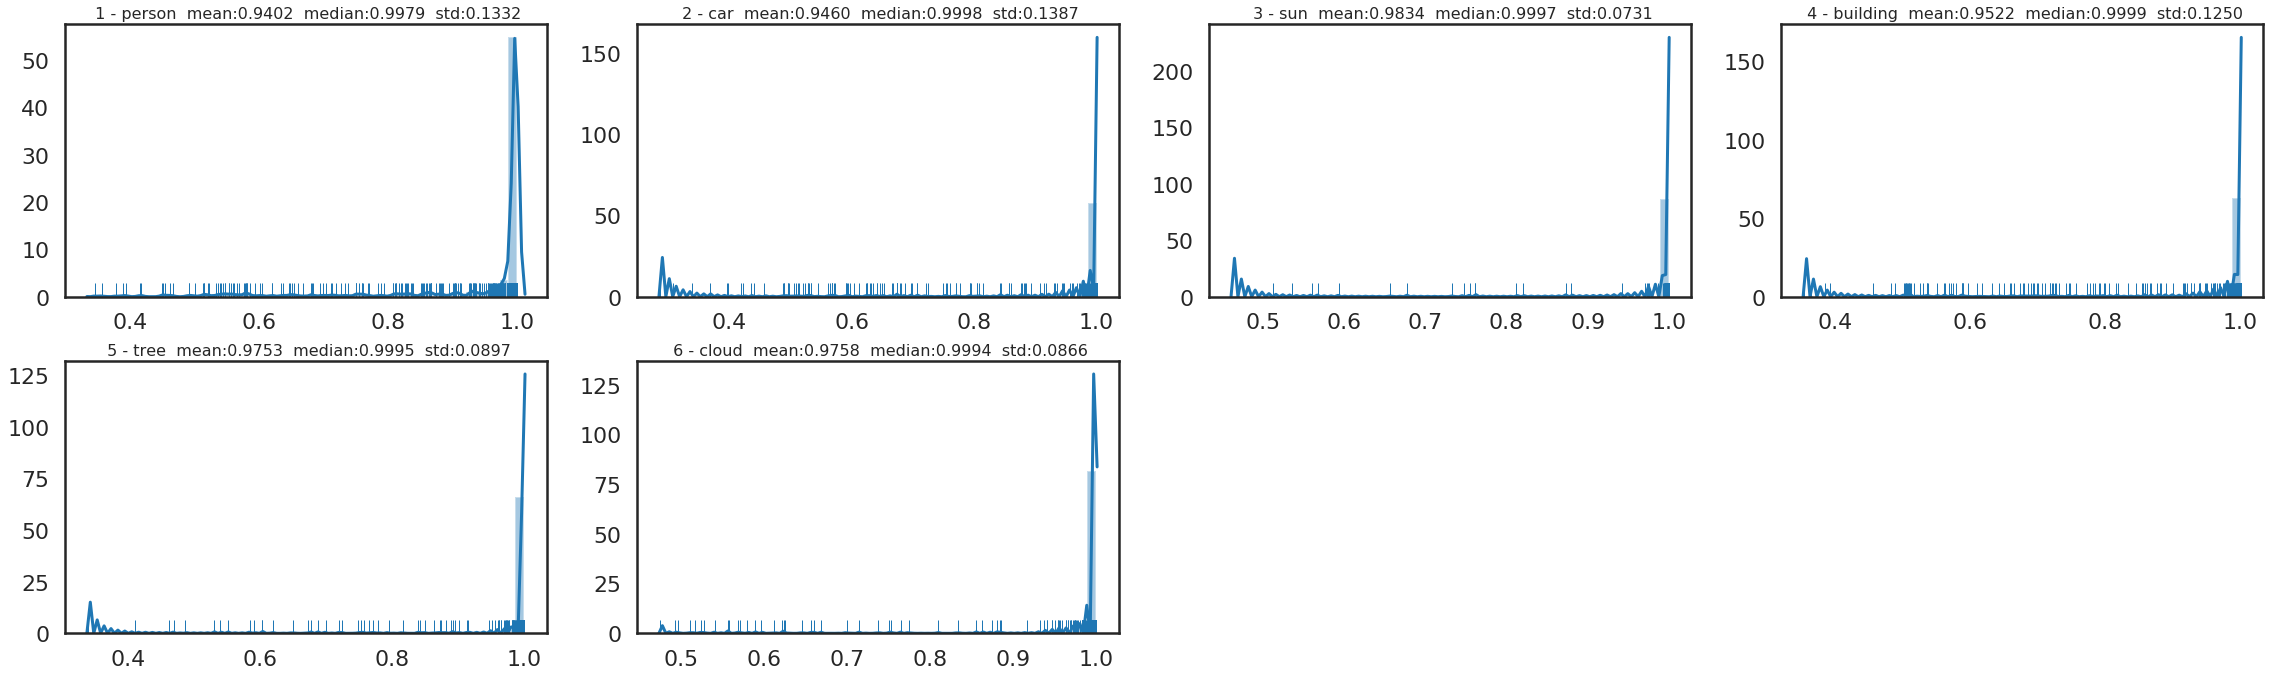

In [11]:
cmap.plot_score_distribution(cls_info, 'mrcnn_score_orig')

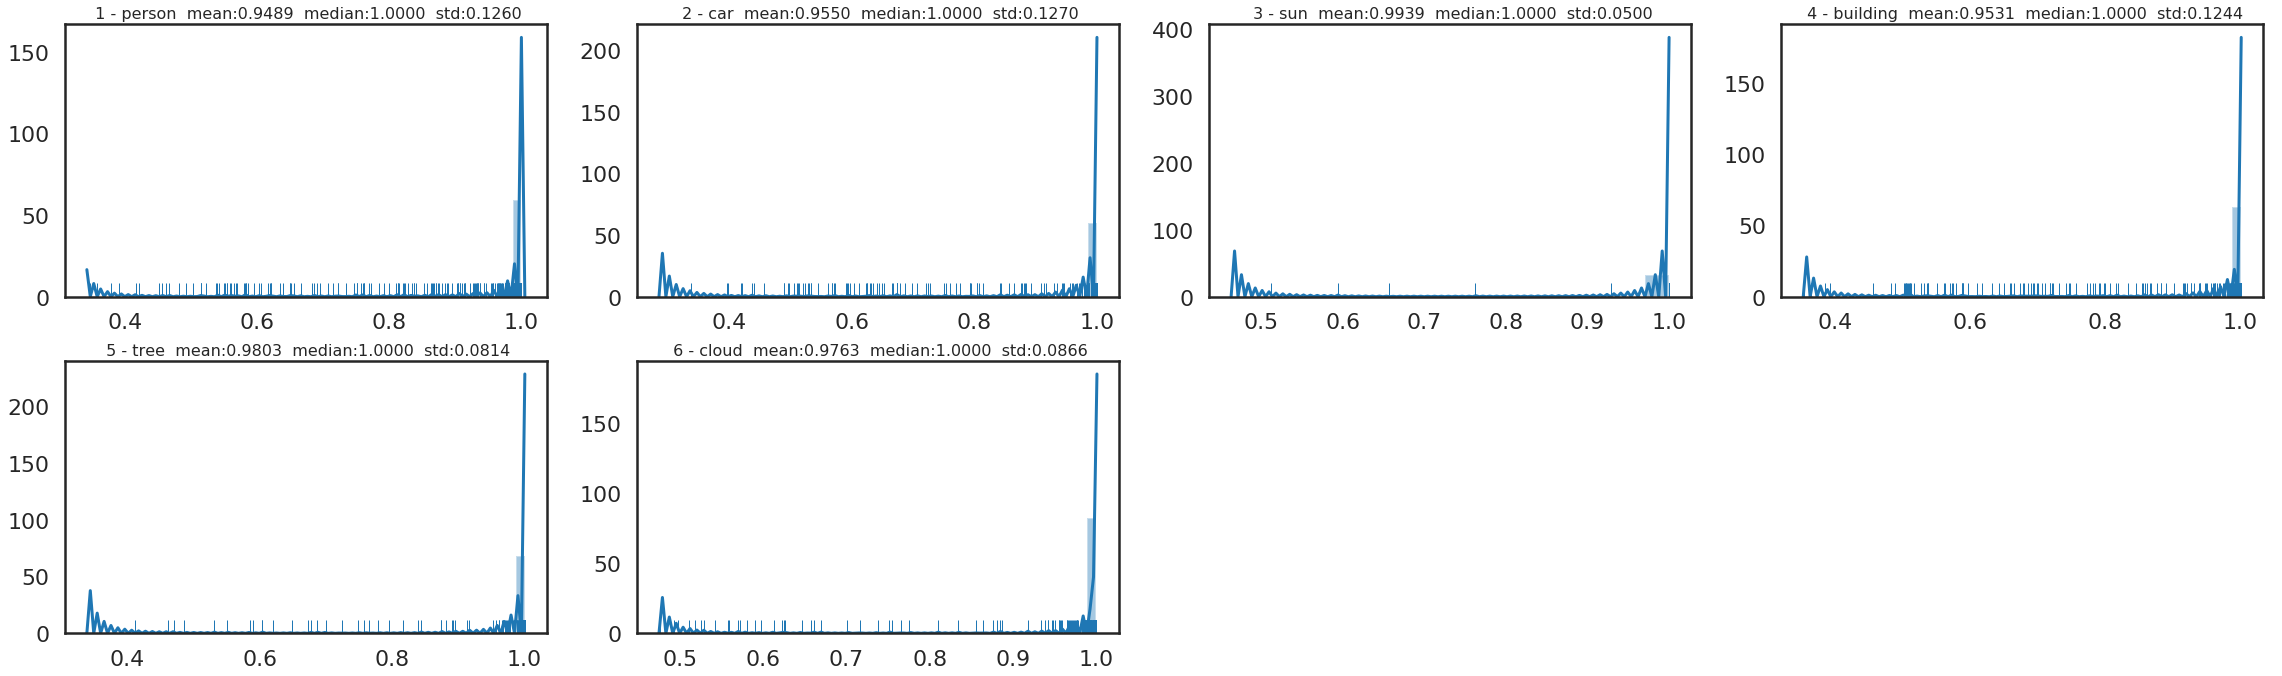

In [13]:
cmap.plot_score_distribution(cls_info, 'mrcnn_score_norm')

In [ ]:
plot_score_distribution(cls_info, 'mrcnn_score_0')

In [ ]:
plot_score_distribution(cls_info, 'mrcnn_score_1')

In [ ]:
plot_score_distribution(cls_info, 'mrcnn_score_2')

In [ ]:
plot_score_distribution(cls_info, 'fcn_score_0')

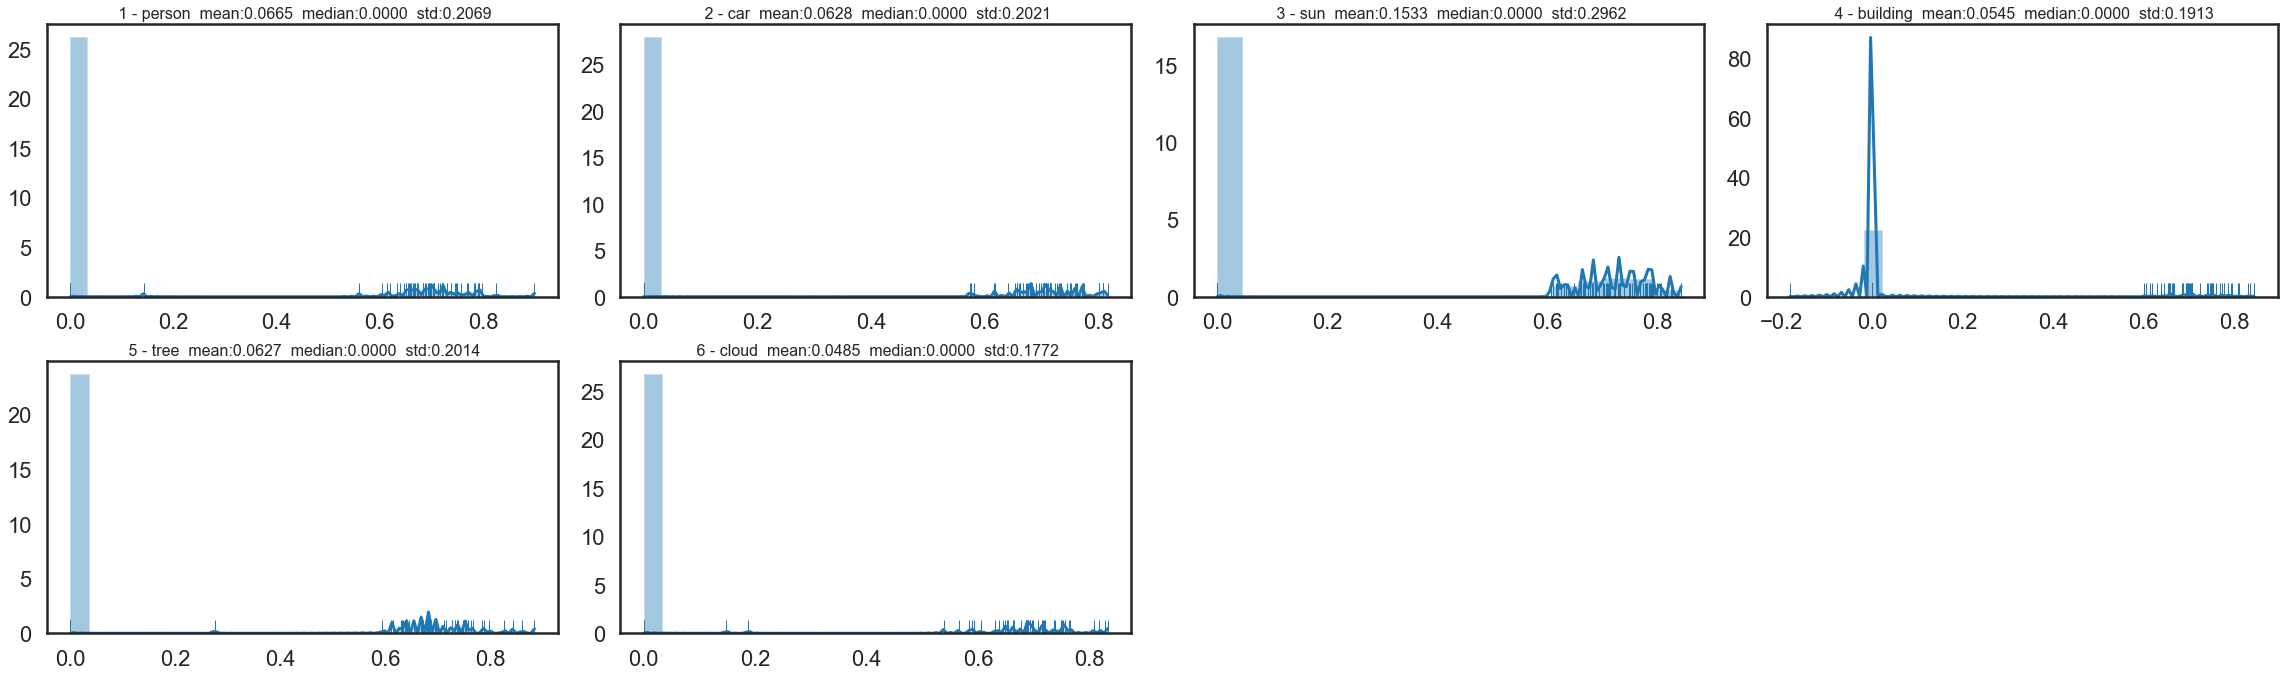

In [11]:
cmap.plot_score_distribution(cls_info, 'fcn_score_1')

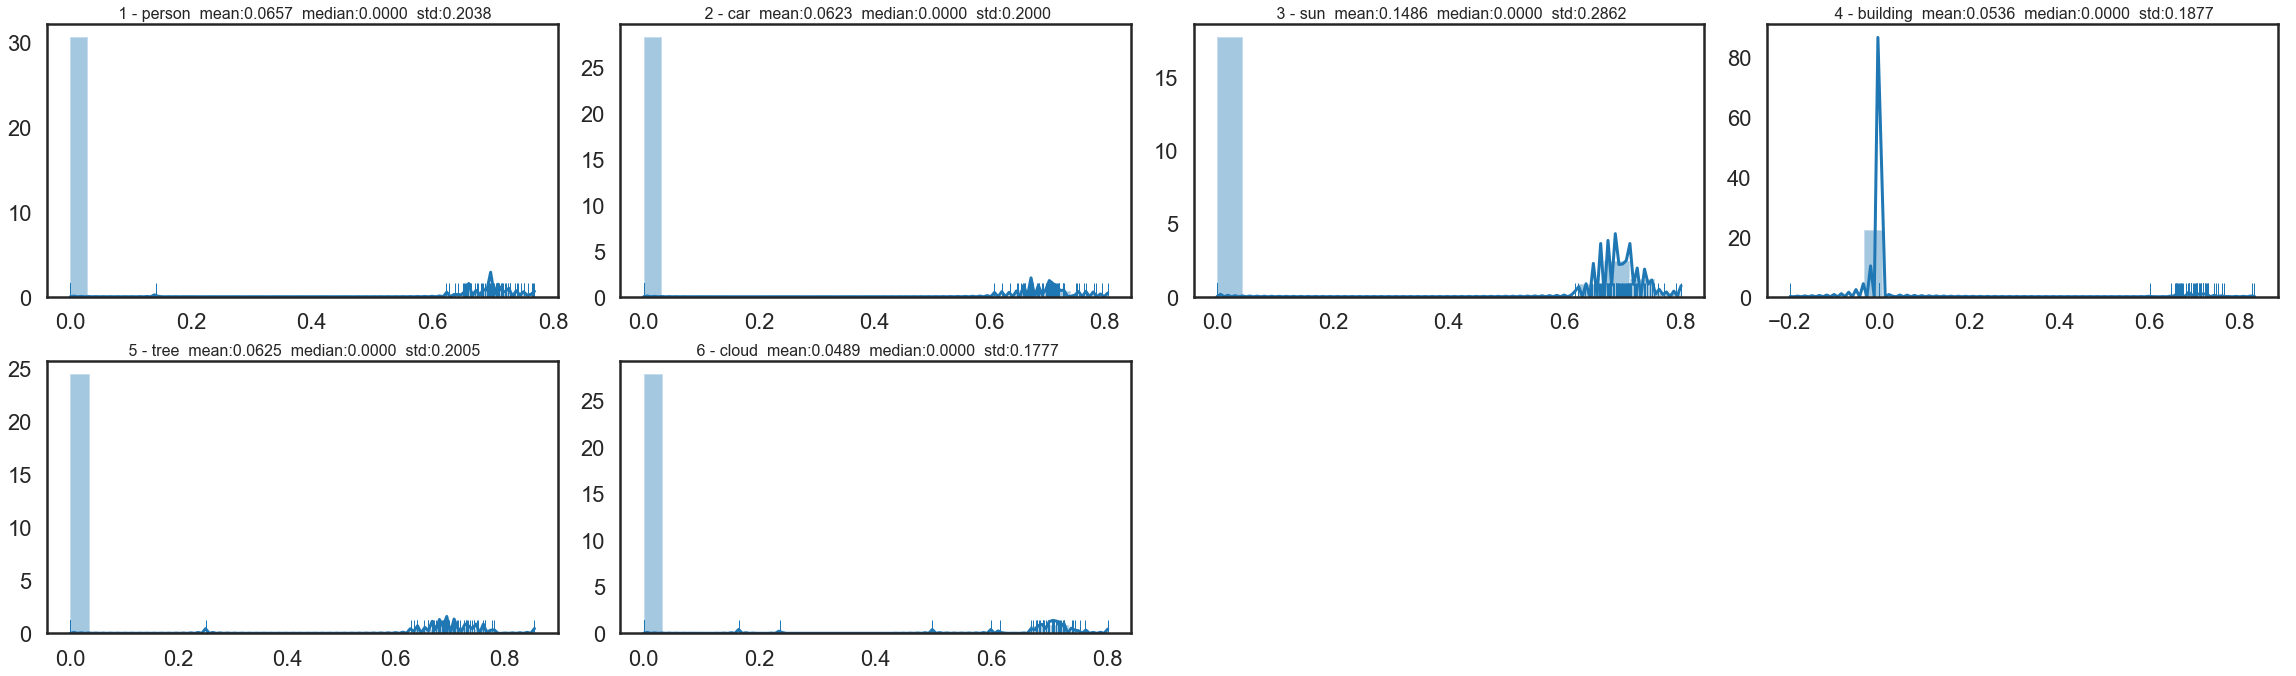

In [9]:
cmap.plot_score_distribution(cls_info, 'fcn_score_2')

#### display of gt_boxes_class, pr_boxes_class

In [ ]:
# gt_boxes_class, pr_boxes_class = filter_by_class(gt_boxes, pr_boxes, class_id= 5)
gt_boxes_class, pr_boxes_class = filter_by_class_2(gt_boxes, pr_boxes, class_id= 2)
print(type(gt_boxes_class), type(pr_boxes_class))
pr_keys = list(pr_boxes_class.keys())
gt_keys = list(gt_boxes_class.keys())
print(len(gt_boxes.keys()), len(pr_boxes.keys()))
print(len(gt_keys), gt_keys[:10])
print(len(pr_keys), pr_keys[:10])
sel_gt_keys = gt_keys[:3]
sel_pr_keys = pr_keys[:3]
# pp.pprint(pr_boxes['newshapes_00002'])
for key in gt_keys[:3]:
    print('-----------------------')
    print('Key: ', key)
    print('-----------------------')
    pp.pprint(pr_boxes_class[key])
    print()
    pp.pprint(gt_boxes_class[key])

In [ ]:

# class_ids     = [10, 11, 12, 13, 14, 15, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 46, 69, 70, 71, 72, 73]
# Runs it for one IoU threshold


### Display mAP for one class and one threshold

In [ ]:
cls = 1

iou_thr = 0.5
start_time = time.time()
data =  cmap.get_avg_precision_at_iou(gt_boxes_class[cls], pr_boxes_class[cls], iou_thr=iou_thr, score_key = 'scores')
end_time = time.time()
print('Single IoU calculation took {:.4f} secs'.format(end_time - start_time))
print('avg precision: {:.4f}'.format(data['avg_prec']))
# pp.pprint(data)

idx = 0
ax = None
avg_precs = []
iou_thrs = []
avg_precs.append(data['avg_prec'])
iou_thrs.append(iou_thr)
precisions = data['precisions']
recalls    = data['recalls']
print(iou_thrs)
print(avg_precs)
print(' precisions: ', precisions.shape)
print(' recalls   : ', recalls.shape)
ax = cmap.plot_pr_curve(precisions, recalls, label='{:.2f}'.format(iou_thr), color=COLORS[idx*2], ax=ax)

avg_precs = [float('{:.4f}'.format(ap)) for ap in avg_precs]
iou_thrs = [float('{:.4f}'.format(thr)) for thr in iou_thrs]
print('map: {:.2f}'.format(100*np.mean(avg_precs)))
print('avg precs: ', avg_precs)
print('iou_thrs:  ', iou_thrs)
plt.legend(loc='upper right', title='IOU Thr', frameon=True)
for xval in np.linspace(0.0, 1.0, 11):
    plt.vlines(xval, 0.0, 1.1, color='gray', alpha=0.3, linestyles='dashed')
end_time = time.time()
print('\nPlotting and calculating mAP takes {:.4f} secs'.format(end_time - start_time))
plt.show()

### Display mAP one threshold (across all classes)

In [ ]:
cls = 1

iou_thr = 0.5
start_time = time.time()
data =  cmap.get_avg_precision_at_iou(gt_boxes, pr_boxes, iou_thr=iou_thr, score_key = 'scores')
end_time = time.time()
print('Single IoU calculation took {:.4f} secs'.format(end_time - start_time))
print('avg precision: {:.4f}'.format(data['avg_prec']))
# pp.pprint(data)

idx = 0
ax = None
avg_precs = []
iou_thrs = []
avg_precs.append(data['avg_prec'])
iou_thrs.append(iou_thr)
precisions = data['precisions']
recalls    = data['recalls']
print(iou_thrs)
print(avg_precs)
print(' precisions: ', precisions.shape)
print(' recalls   : ', recalls.shape)
ax = cmap.plot_pr_curve(precisions, recalls, label='{:.2f}'.format(iou_thr), color=COLORS[idx*2], ax=ax)

avg_precs = [float('{:.4f}'.format(ap)) for ap in avg_precs]
iou_thrs = [float('{:.4f}'.format(thr)) for thr in iou_thrs]
print('map: {:.2f}'.format(100*np.mean(avg_precs)))
print('avg precs: ', avg_precs)
print('iou_thrs:  ', iou_thrs)
plt.legend(loc='upper right', title='IOU Thr', frameon=True)
for xval in np.linspace(0.0, 1.0, 11):
    plt.vlines(xval, 0.0, 1.1, color='gray', alpha=0.3, linestyles='dashed')
end_time = time.time()
print('\nPlotting and calculating mAP takes {:.4f} secs'.format(end_time - start_time))
plt.show()

## Barchart - AP vs. IoU Threshold for various scores 

 Num disp classes 1  Columns:  1  Rows:  1


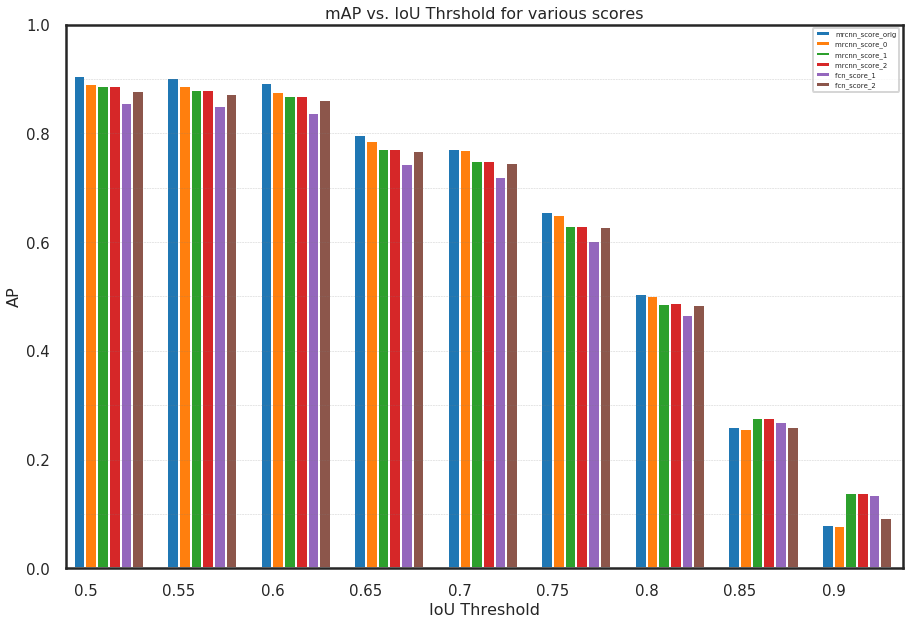


                                                  AP @ IoU Thresholds for computed scores                                                   

-------------------------------------------------------------  IoU Thresholds  -------------------------------------------------------------
Score -                           0.5000     0.5500     0.6000     0.6500     0.7000     0.7500     0.8000     0.8500     0.9000       mAP
--------------------------------------------------------------------------------------------------------------------------------------------
mrcnn_score_orig                  0.9054     0.9023     0.8921     0.7962     0.7720     0.6545     0.5049     0.2592     0.0799     %64.07 
mrcnn_score_0                     0.8912     0.8870     0.8771     0.7862     0.7696     0.6495     0.5010     0.2567     0.0780     %63.29 
mrcnn_score_1                     0.8869     0.8806     0.8689     0.7711     0.7500     0.6296     0.4871     0.2773     0.1381     %63.22 
mrcnn_score_2

In [7]:
# disp_scores  = [ 'mrcnn_score_orig' , 'mrcnn_score_norm', 'mrcnn_score_0', 'mrcnn_score_1', 'mrcnn_score_2', 'fcn_score_0', 'fcn_score_1', 'fcn_score_2']
disp_scores  = [ 'mrcnn_score_orig' , 'mrcnn_score_0', 'mrcnn_score_1', 'mrcnn_score_2',  'fcn_score_1', 'fcn_score_2']
disp_ious    = [0.5 , 0.75, 0.9]
cmap.plot_mAP_vs_IoUs_BarChart(all_data, disp_scores, class_ids= [0])# , disp_ious)

## Barchart mAP vs. Class for different scores `plot_mAP_vs_class()`

Epch: 0124
disp_scores:  ['mrcnn_score_orig', 'mrcnn_score_1', 'fcn_score_1', 'mrcnn_score_2', 'fcn_score_2']


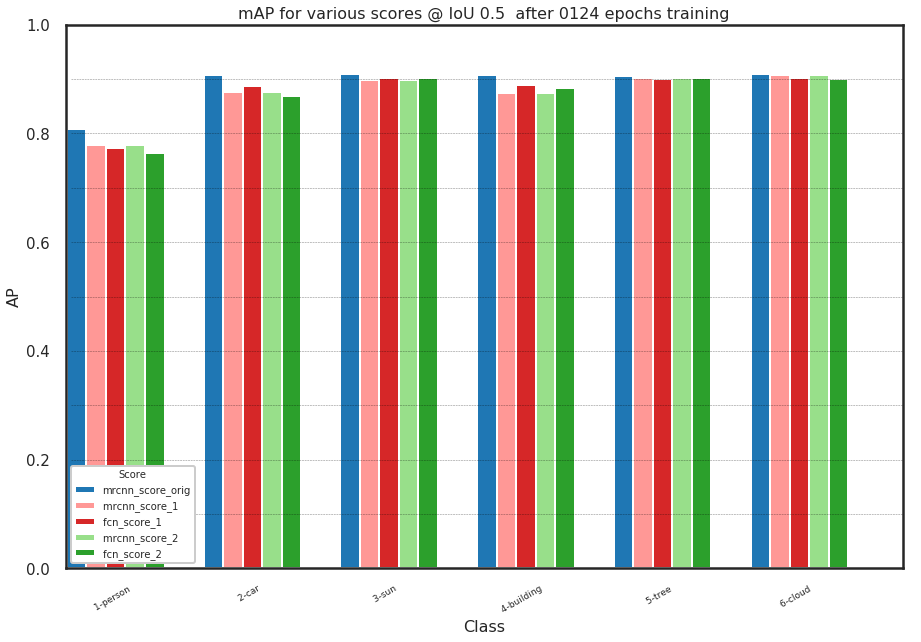


                                       AP @ IoU 0.50 Thresholds for Computed Scores after 0124 epochs                                       

-----------------------------------------------------------------  scores  -----------------------------------------------------------------
Id - ClassName           mrcnn_score_orig     mrcnn_score_1       fcn_score_1     mrcnn_score_2       fcn_score_2
--------------------------------------------------------------------------------------------------------------------------------------------
 1 - person                        80.84%            77.78%            77.38%            77.85%            76.47% 
 2 - car                           90.82%            87.71%            88.76%            87.71%            86.95% 
 3 - sun                           90.91%            89.76%            90.25%            89.76%            90.12% 
 4 - building                      90.71%            87.52%            89.00%            87.52%            88.33% 
 

In [24]:
# disp_scores  = [ 'mrcnn_score_orig' , 'mrcnn_score_norm', 'mrcnn_score_0', 'mrcnn_score_1', 'mrcnn_score_2', 'fcn_score_0', 'fcn_score_1', 'fcn_score_2']
disp_scores  = [ 'mrcnn_score_orig' , 'mrcnn_score_1', 'fcn_score_1', 'mrcnn_score_2', 'fcn_score_2']
print('Epch:', epochs)
cmap.plot_mAP_vs_class_BarChart(all_data, disp_scores, class_ids= CLASS_IDS, class_names = CLASS_NAMES, iou = 0.5, epochs = epochs)



# cmap.plot_mAP_vs_class_BarChart(all_data, disp_scores, class_ids= CLASS_IDS_SG1,class_names = CLASS_NAMES, iou = 0.5)
# cmap.plot_mAP_vs_class_BarChart(all_data, disp_scores, class_ids= CLASS_IDS_SG2,class_names = CLASS_NAMES, iou = 0.5)
# cmap.plot_mAP_vs_class_BarChart(all_data, disp_scores, class_names = CLASS_NAMES, iou = 0.5)
# cmap.plot_mAP_vs_class_BarChart(all_data, disp_scores, class_names = CLASS_NAMES, iou = 0.75)

## Plot combined mAP for different IoU thresholds for each score
(one type of score, e.g. 'scores' - all classes combined)

['ALL CLASSES', 'person', 'car', 'sun', 'building', 'tree', 'cloud']

                                         AP @ IoU Thresholds for Score Computation: mrcnn_score_orig                                        

-------------------------------------------------------------  IoU Thresholds  -------------------------------------------------------------
Id - ClassName                    0.2000     0.2500     0.3000     0.3500     0.4000     0.4500     0.5000     0.5500     0.6000     0.6500     0.7000     0.7500     0.8000     0.8500     0.9000       mAP
--------------------------------------------------------------------------------------------------------------------------------------------
  1 - person                      0.9011     0.8992     0.8970     0.8954     0.8921     0.8146     0.8084     0.7965     0.6878     0.5307     0.3618     0.1987     0.0708     0.0283     0.0069      %58.60 
  2 - car                         0.9086     0.9086     0.9086     0.9084     0.9084     0.90

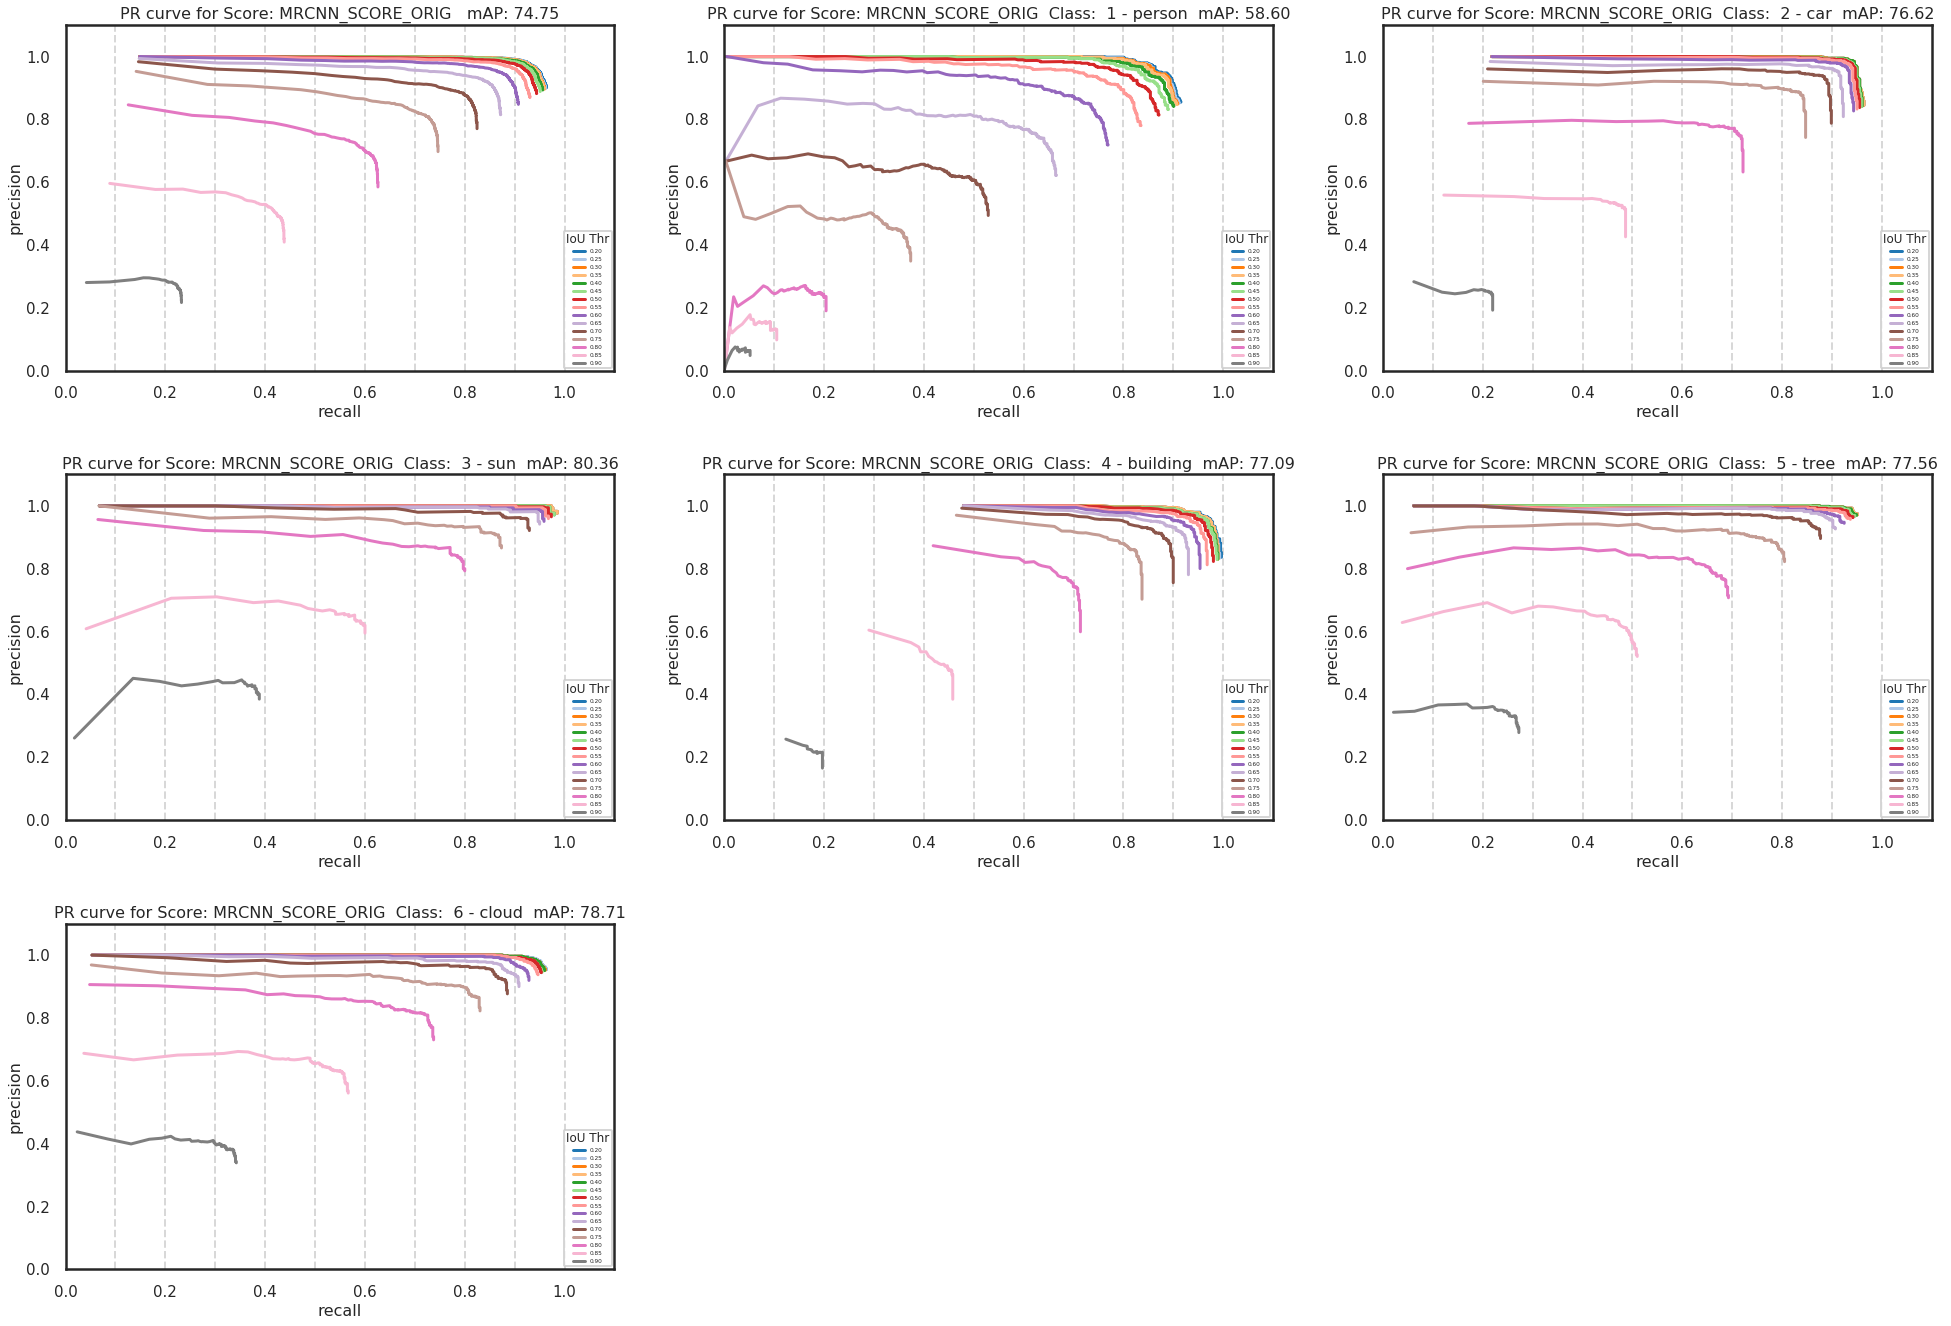

In [16]:
# plot_mAP_by_score(all_data, 'scores' )

cmap.plot_mAP_by_IOU(all_data, 'mrcnn_score_orig' , class_ids = None , class_names = CLASS_NAMES, columns = 3)

In [ ]:
# plot_mAP_by_score(all_data, 'scores' )

cmap.plot_mAP_by_IOU(all_data, 'mrcnn_score_0' , class_ids = 0 , class_names = class_names, columns = 3)

In [ ]:
# plot_mAP_by_score(all_data, 'scores' )
cmap.plot_mAP_by_IOU(all_data, 'mrcnn_score_1' , class_ids = 0 ,class_names = class_names, columns = 3)

In [ ]:
# plot_mAP_by_score(all_data, 'scores' )
cmap.plot_mAP_by_IOU(all_data, 'mrcnn_score_2' , class_ids = 0 ,class_names = class_names, columns = 3)

In [ ]:
# plot_mAP_by_score(all_data, 'scores' )
cmap.plot_mAP_by_IOU(all_data, 'mrcnn_score_norm' , class_ids = 0 ,class_names = class_names, columns = 3)

In [ ]:
# plot_mAP_by_score(all_data, 'scores' )
cmap.plot_mAP_by_IOU(all_data, 'fcn_score_0' , class_ids = 0 , class_names = class_names,columns = 3)

In [ ]:
# plot_mAP_by_score(all_data, 'scores' )
cmap.plot_mAP_by_IOU(all_data, 'fcn_score_1' , class_ids = 0 , class_names = class_names,columns = 3)

['ALL CLASSES', 'person', 'car', 'sun', 'building', 'tree', 'cloud']
idx/iou_key:  0 0.2
idx/iou_key:  1 0.25
idx/iou_key:  2 0.3
idx/iou_key:  3 0.35
idx/iou_key:  4 0.4
idx/iou_key:  5 0.45
idx/iou_key:  6 0.5
idx/iou_key:  7 0.55
idx/iou_key:  8 0.6
idx/iou_key:  9 0.65
idx/iou_key:  10 0.7
idx/iou_key:  11 0.75
idx/iou_key:  12 0.8
idx/iou_key:  13 0.85
idx/iou_key:  14 0.9

                                           AP @ IoU Thresholds for Score Computation: fcn_score_2                                           

-------------------------------------------------------------  IoU Thresholds  -------------------------------------------------------------
Id - ClassName                    0.2000     0.2500     0.3000     0.3500     0.4000     0.4500     0.5000     0.5500     0.6000     0.6500     0.7000     0.7500     0.8000     0.8500     0.9000       mAP
----------------------------------------------------------------------------------------------------------------------------------

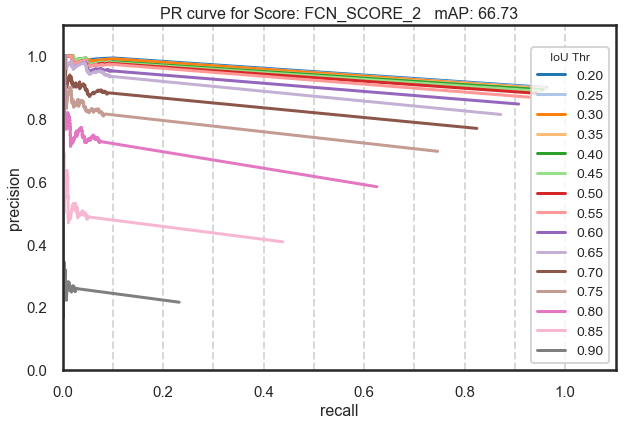

In [20]:
# plot_mAP_by_score(all_data, 'scores' )
cmap.plot_mAP_by_IOU(all_data, 'fcn_score_2' , class_ids = 0 , class_names = CLASS_NAMES,columns = 2)

## Plot combined mAP info for different scores (at a given IoU threshold, all classes combined)

In [ ]:
disp_scores  = [ 'mrcnn_score_orig' , 'mrcnn_score_norm', 'mrcnn_score_0', 'mrcnn_score_1', 'mrcnn_score_2' ,'fcn_score_0', 'fcn_score_1', 'fcn_score_2']
cmap.plot_mAP_by_scores(all_data, scores = disp_scores, class_ids = [0], class_names = class_names,iou = 0.80)

In [ ]:
disp_scores  = [ 'mrcnn_score_orig' , 'mrcnn_score_norm', 'mrcnn_score_0', 'mrcnn_score_1',  'fcn_score_0', 'fcn_score_1', 'fcn_score_2']
cmap.plot_mAP_by_scores(all_data, scores = disp_scores, class_ids = [0], class_names = class_names, iou = 0.85)

In [ ]:
disp_scores  = [ 'mrcnn_score_orig' , 'mrcnn_score_norm', 'mrcnn_score_0', 'mrcnn_score_1',  'fcn_score_0', 'fcn_score_1', 'fcn_score_2']
cmap.plot_mAP_by_scores(all_data, scores = disp_scores, class_ids = [0], class_names = class_names, iou = 0.75)

## Indvidual classes - Plot mAP info for  at different thresholds (one type of score, e.g. 'scores')

### Plot mAP for `mrcnn_score_orig`

['ALL CLASSES', 'person', 'car', 'sun', 'building', 'tree', 'cloud']

                                         AP @ IoU Thresholds for Score Computation: mrcnn_score_orig                                        

-------------------------------------------------------------  IoU Thresholds  -------------------------------------------------------------
Id - ClassName                    0.2000     0.2500     0.3000     0.3500     0.4000     0.4500     0.5000     0.5500     0.6000     0.6500     0.7000     0.7500     0.8000     0.8500     0.9000       mAP
--------------------------------------------------------------------------------------------------------------------------------------------
  1 - person                      0.9011     0.8992     0.8970     0.8954     0.8921     0.8146     0.8084     0.7965     0.6878     0.5307     0.3618     0.1987     0.0708     0.0283     0.0069      %58.60 
  2 - car                         0.9086     0.9086     0.9086     0.9084     0.9084     0.90

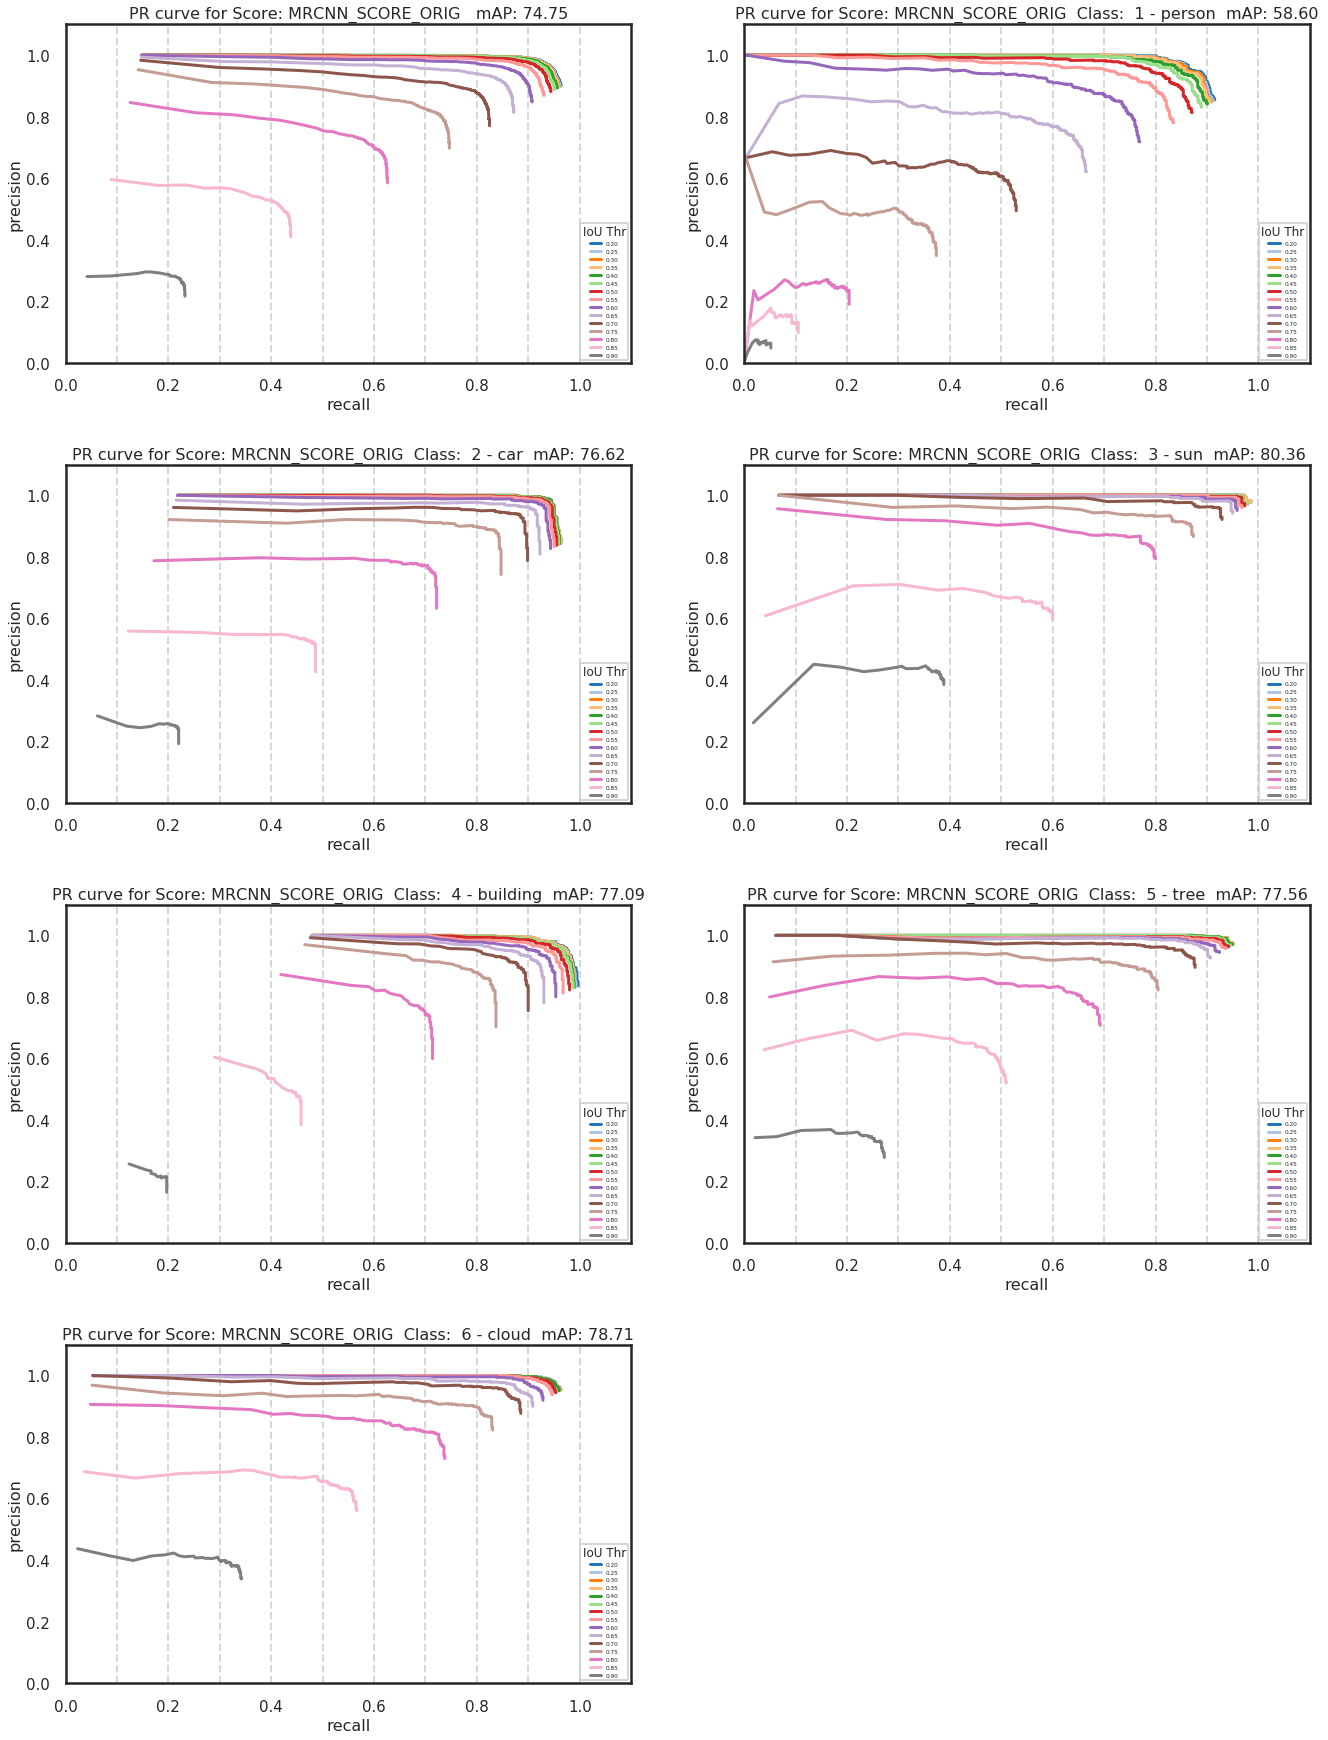

In [17]:
# plot_mAP_by_score(all_data, 'scores' )
cmap.plot_mAP_by_IOU(all_data, 'mrcnn_score_orig', class_names = CLASS_NAMES , columns =2)

### Plot mAP for `mrcnn_score_norm`

In [ ]:
plot_mAP_by_IOU(all_data, 'mrcnn_score_norm')

### Plot mAP for `mrcnn_score_0`

In [ ]:
cmap.plot_mAP_by_IOU(all_data, 'mrcnn_score_0', class_names = class_names )

### Plot mAP for `mrcnn_score_1`

In [ ]:
plot_mAP_by_IOU(all_data, 'mrcnn_score_1', class_names = class_names )

### Plot mAP for `mrcnn_score_2`

In [ ]:
cmap.plot_mAP_by_IOU(all_data, 'mrcnn_score_2', class_names = class_names )

### Plot mAP for `fcn_score_1`

In [ ]:
cmap.plot_mAP_by_IOU(all_data, 'fcn_score_1', class_names = class_names )

### Plot mAP for `fcn_score_2`

['ALL CLASSES', 'person', 'car', 'sun', 'building', 'tree', 'cloud']
idx/iou_key:  0 0.2
idx/iou_key:  1 0.25
idx/iou_key:  2 0.3
idx/iou_key:  3 0.35
idx/iou_key:  4 0.4
idx/iou_key:  5 0.45
idx/iou_key:  6 0.5
idx/iou_key:  7 0.55
idx/iou_key:  8 0.6
idx/iou_key:  9 0.65
idx/iou_key:  10 0.7
idx/iou_key:  11 0.75
idx/iou_key:  12 0.8
idx/iou_key:  13 0.85
idx/iou_key:  14 0.9
idx/iou_key:  0 0.2
idx/iou_key:  1 0.25
idx/iou_key:  2 0.3
idx/iou_key:  3 0.35
idx/iou_key:  4 0.4
idx/iou_key:  5 0.45
idx/iou_key:  6 0.5
idx/iou_key:  7 0.55
idx/iou_key:  8 0.6
idx/iou_key:  9 0.65
idx/iou_key:  10 0.7
idx/iou_key:  11 0.75
idx/iou_key:  12 0.8
idx/iou_key:  13 0.85
idx/iou_key:  14 0.9
idx/iou_key:  0 0.2
idx/iou_key:  1 0.25
idx/iou_key:  2 0.3
idx/iou_key:  3 0.35
idx/iou_key:  4 0.4
idx/iou_key:  5 0.45
idx/iou_key:  6 0.5
idx/iou_key:  7 0.55
idx/iou_key:  8 0.6
idx/iou_key:  9 0.65
idx/iou_key:  10 0.7
idx/iou_key:  11 0.75
idx/iou_key:  12 0.8
idx/iou_key:  13 0.85
idx/iou_key:  14

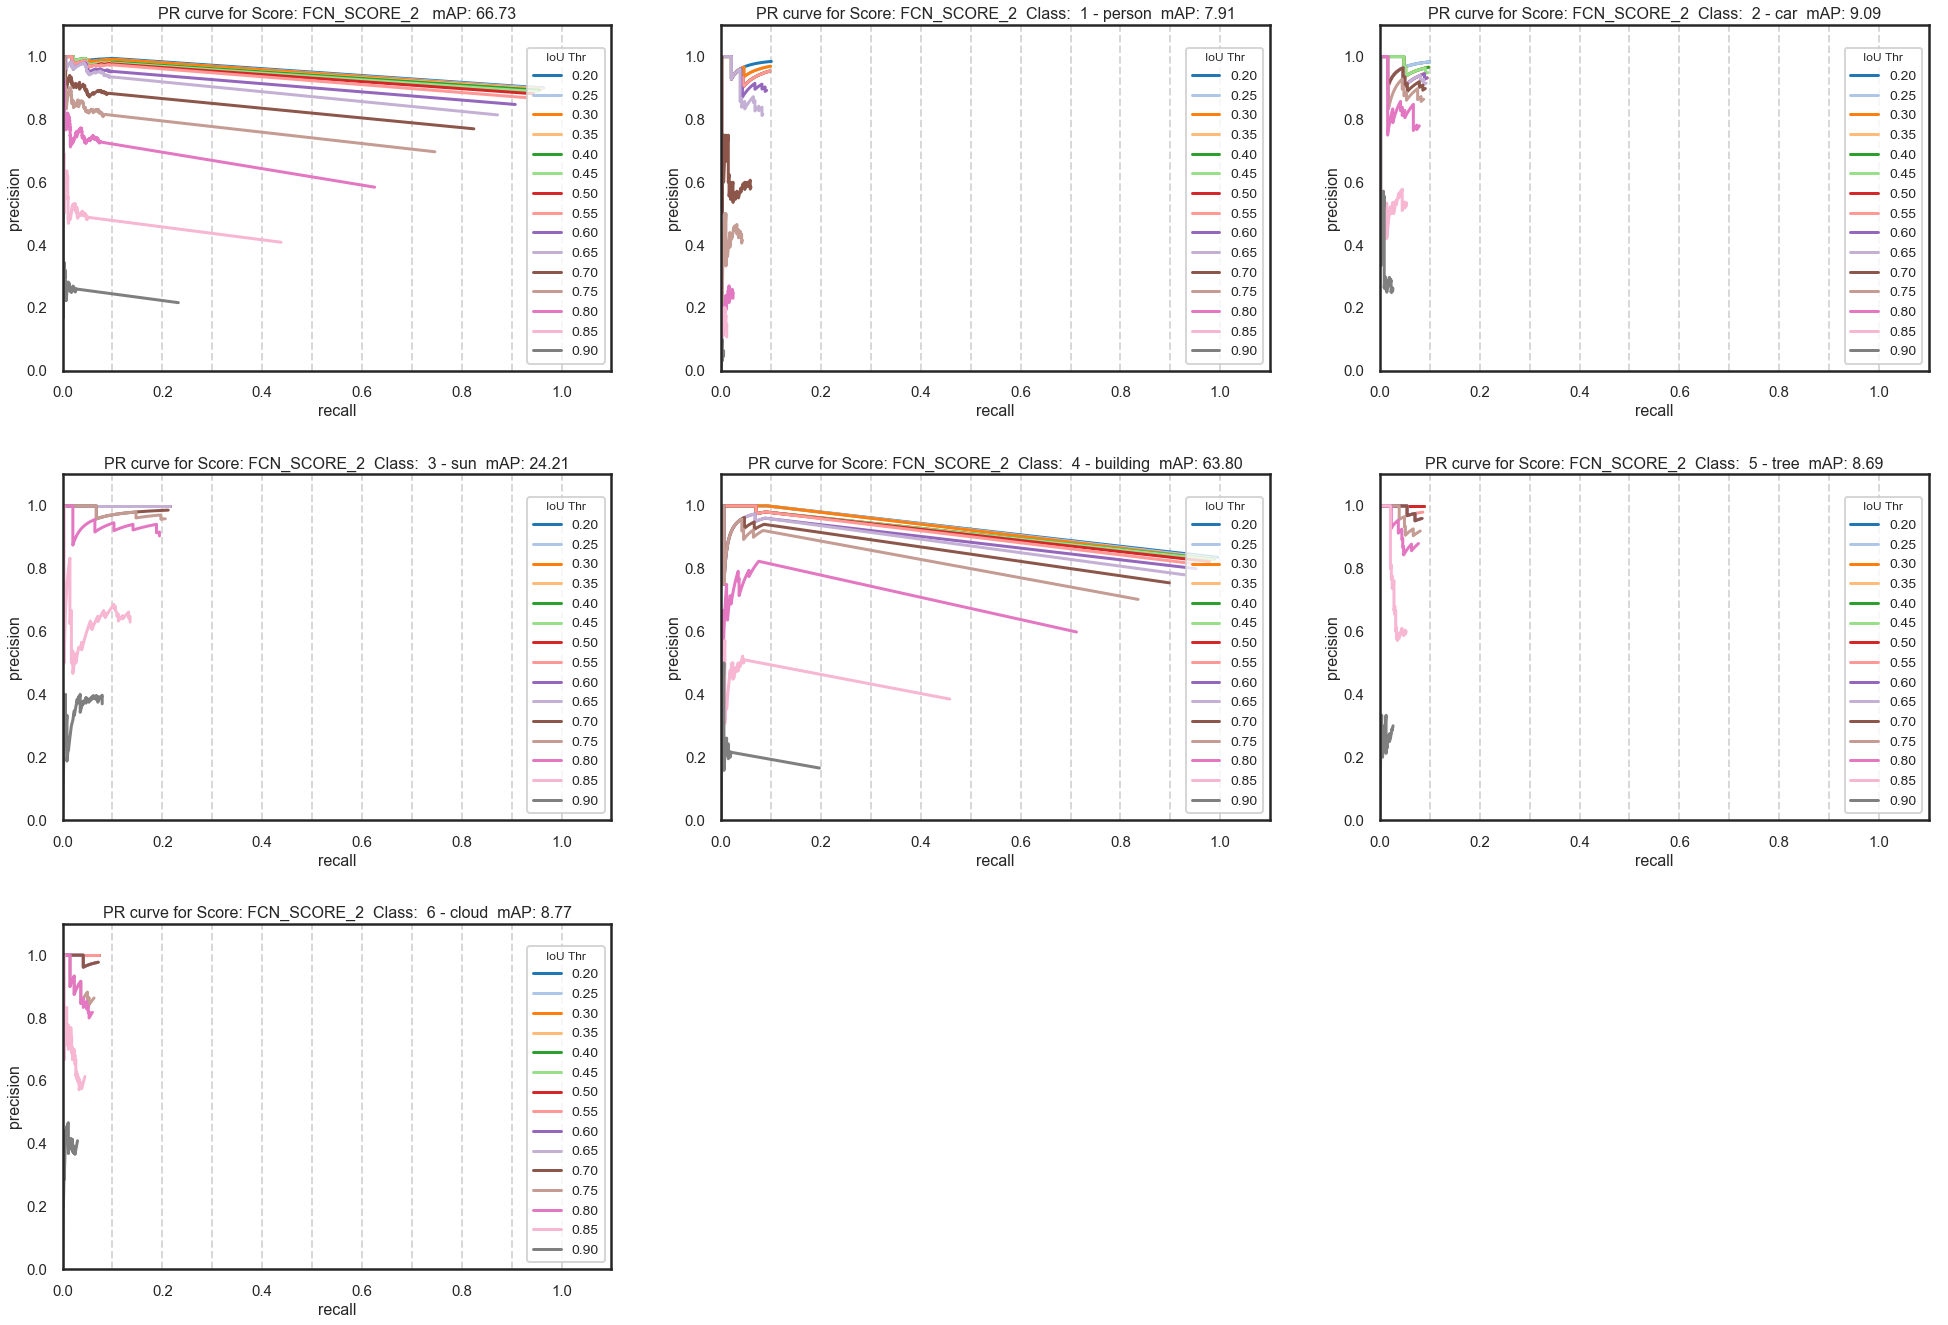

In [24]:
cmap.plot_mAP_by_IOU(all_data, 'fcn_score_2', class_names = CLASS_NAMES )

## Indvidual classes - Plot mAP info for different scores (at a given IoU threshold)

### IoU = 0.5

Epch: 0181
col/rows:  2 4

                                                     AP @ IoU 0.50 Thresholds for Computed Scores                                                     

----------------------------------------------------------------------  scores  ----------------------------------------------------------------------
Id - ClassName           mrcnn_score_orig     mrcnn_score_1       fcn_score_1
------------------------------------------------------------------------------------------------------------------------------------------------------
 1 - person                        0.8084            0.7778            0.7730 
 2 - car                           0.9082            0.8771            0.8880 
 3 - sun                           0.9091            0.8976            0.9031 
 4 - building                      0.9071            0.8752            0.8889 
 5 - tree                          0.9056            0.9014            0.9004 
 6 - cloud                         0.9084     

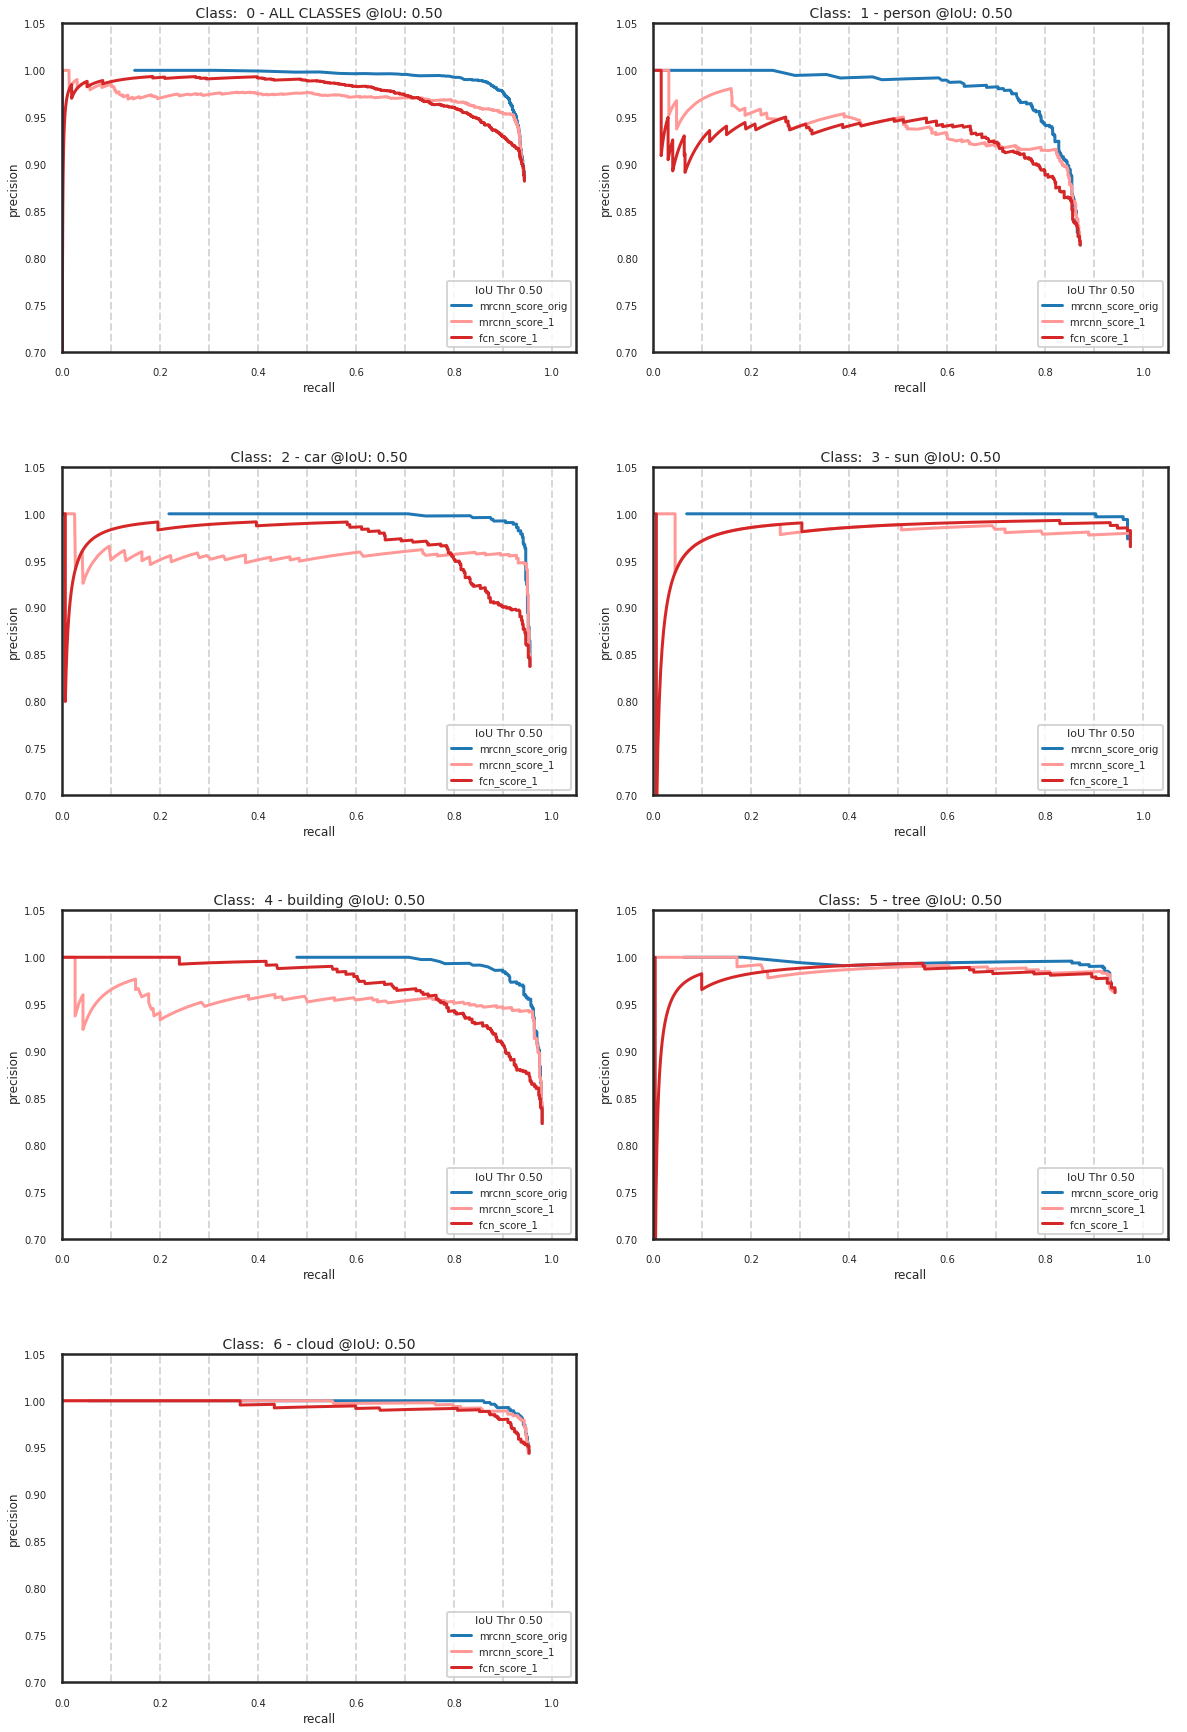

col/rows:  2 4

                                                     AP @ IoU 0.50 Thresholds for Computed Scores                                                     

----------------------------------------------------------------------  scores  ----------------------------------------------------------------------
Id - ClassName           mrcnn_score_orig     mrcnn_score_2       fcn_score_2
------------------------------------------------------------------------------------------------------------------------------------------------------
 1 - person                        80.84%            77.85%            76.05% 
 2 - car                           90.82%            87.71%            86.38% 
 3 - sun                           90.91%            89.76%            89.83% 
 4 - building                      90.71%            87.52%            88.72% 
 5 - tree                          90.56%            90.14%            89.96% 
 6 - cloud                         90.84%            90.7

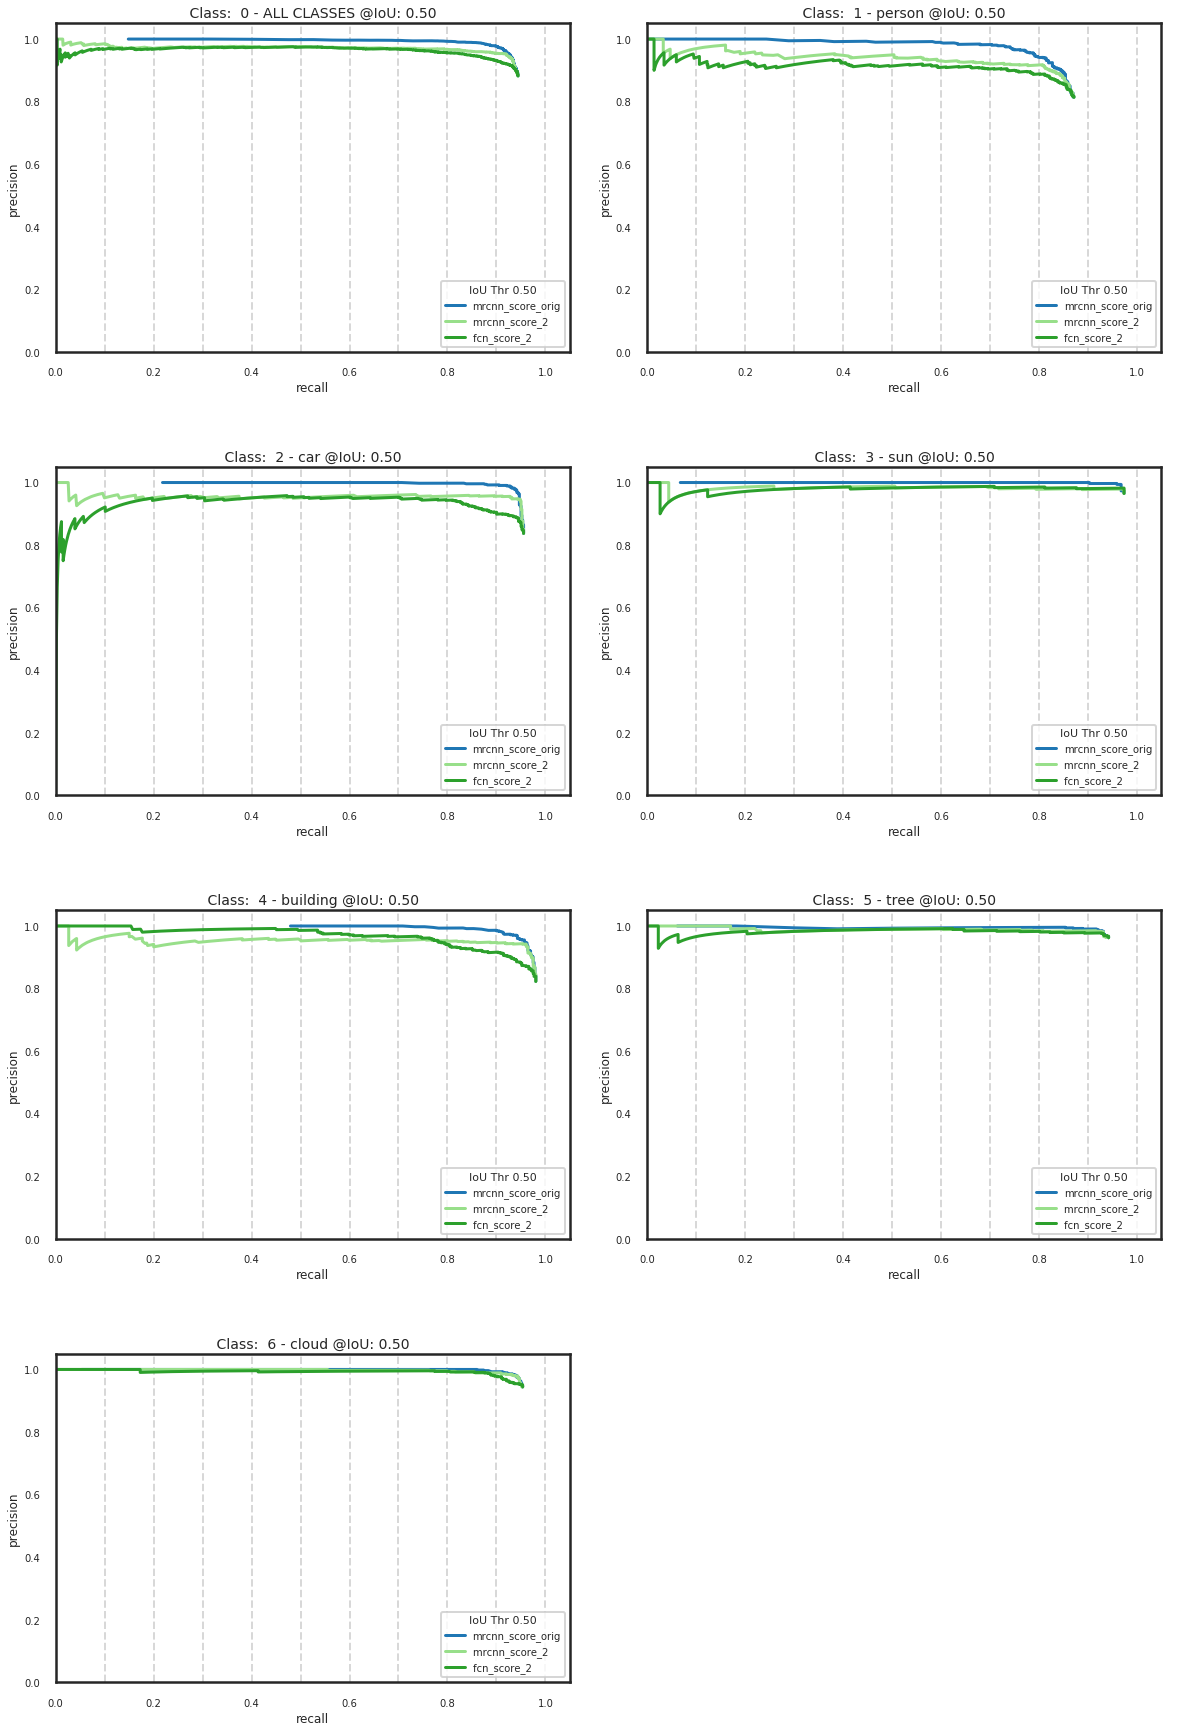

In [20]:
print('Epch:', epochs)
disp_classes = [0,1,2,3,4,5,6]
disp_scores  = [ 'mrcnn_score_orig', 'mrcnn_score_1',  'fcn_score_1']
cmap2.plot_mAP_by_scores(all_data, scores = disp_scores, class_ids = disp_classes, class_names= CLASS_NAMES, iou = 0.50, columns = 2, min_y =0.7)
disp_scores  = [ 'mrcnn_score_orig', 'mrcnn_score_2',  'fcn_score_2']
cmap.plot_mAP_by_scores(all_data, scores = disp_scores, class_ids = disp_classes, class_names= CLASS_NAMES, iou = 0.5, columns = 2)

###  Calculate information for one class at one  threshold with different scores, e.g. 'scores')

col/rows:  2 4


KeyError: 'mrcnn_score_norm'

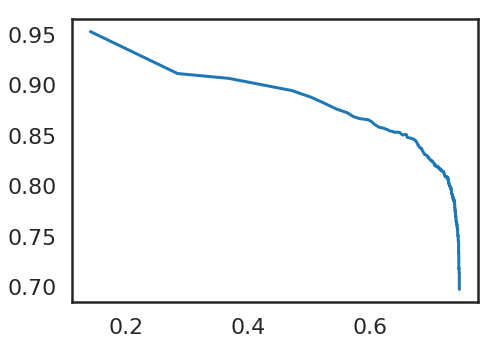

In [14]:
disp_classes = [0,1,2,3,4,5,6]  
disp_scores  = [ 'mrcnn_score_orig' , 'mrcnn_score_norm', 'mrcnn_score_0', 'mrcnn_score_1', 'mrcnn_score_2', 'fcn_score_0', 'fcn_score_1', 'fcn_score_2']
cmap.plot_mAP_by_scores(all_data, scores = disp_scores, class_ids = disp_classes, class_names= CLASS_NAMES, iou = 0.75)

In [ ]:
# cls = 1
# for i in pr_boxes_class[cls]:
#     print(i)
#     print(pr_boxes_class[cls][i]['scores'])
#     print(pr_boxes_class[cls][i]['mrcnn_score_orig'])
#     print(pr_boxes_class[cls][i]['mrcnn_score_norm'])
#     print('---------')

In [ ]:
pp.pprint(all_data[1].keys())

In [ ]:
# pp.pprint(all_data[1]['mrcnn_score_norm'])

In [ ]:
pp.pprint(all_data[1]['mrcnn_score_orig'])

In [ ]:
pp.pprint(all_data[1]['scores'])

In [ ]:
print(all_data[1]['mrcnn_score_0'])

In [ ]:
print(all_data[1]['mrcnn_score_1'])

In [ ]:
print(all_data[1]['mrcnn_score_2'])

In [ ]:
print(all_data[1]['scores'] == all_data[1]['mrcnn_score_orig'])

In [ ]:
for idx, iou_thr in enumerate(np.linspace(0.5, 0.95, 10)):
    print(idx, iou_thr, np.round(iou_thr,2))
for idx, iou_thr in enumerate(np.arange(0.5, 0.95, 0.05)):
    print(idx, iou_thr)    
for idx, iou_thr in enumerate(range(0.5, 0.95,  0.05)):
    print(idx, iou_thr)    

## Run barchart for all weight files

loaded : test_map_info_epoch0001.pkl
Epch: 0001
disp_scores:  ['mrcnn_score_orig', 'mrcnn_score_1', 'fcn_score_1', 'mrcnn_score_2', 'fcn_score_2']


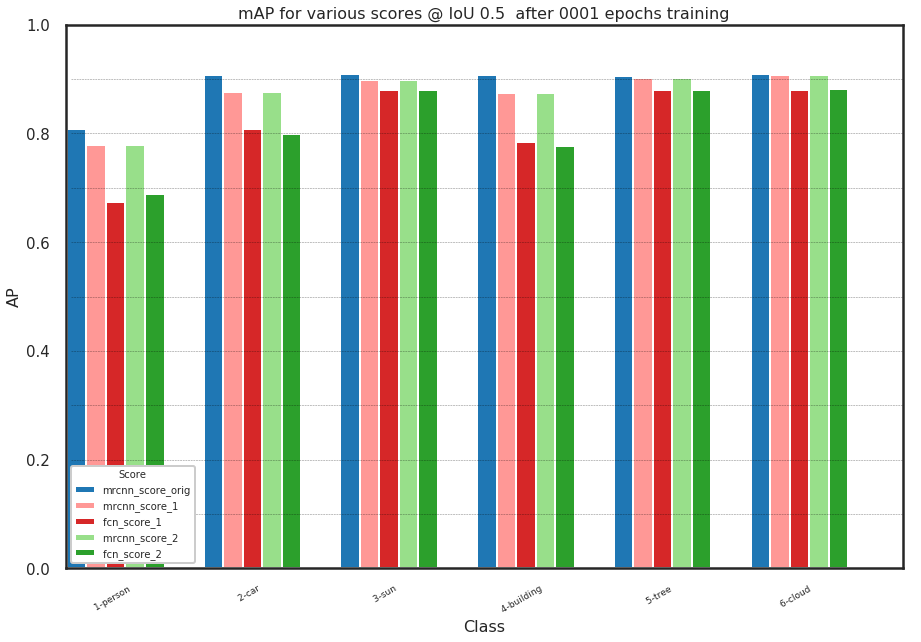


                                       AP @ IoU 0.50 Thresholds for Computed Scores after 0001 epochs                                       

-----------------------------------------------------------------  scores  -----------------------------------------------------------------
Id - ClassName           mrcnn_score_orig     mrcnn_score_1       fcn_score_1     mrcnn_score_2       fcn_score_2
--------------------------------------------------------------------------------------------------------------------------------------------
 1 - person                        80.84%            77.78%            67.48%            77.85%            68.81% 
 2 - car                           90.82%            87.71%            80.76%            87.71%            79.82% 
 3 - sun                           90.91%            89.76%            88.05%            89.76%            88.05% 
 4 - building                      90.71%            87.52%            78.47%            87.52%            77.78% 
 

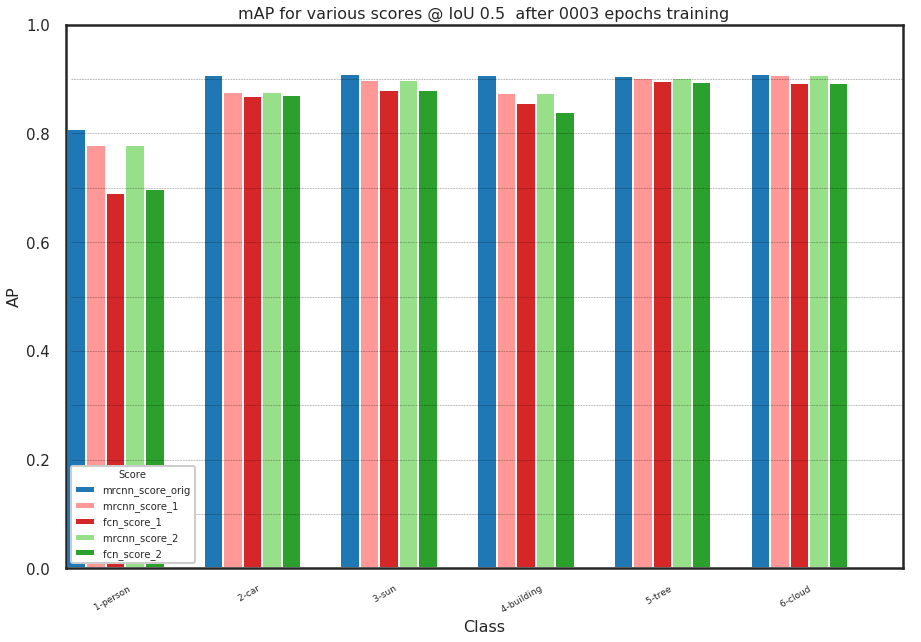


                                       AP @ IoU 0.50 Thresholds for Computed Scores after 0003 epochs                                       

-----------------------------------------------------------------  scores  -----------------------------------------------------------------
Id - ClassName           mrcnn_score_orig     mrcnn_score_1       fcn_score_1     mrcnn_score_2       fcn_score_2
--------------------------------------------------------------------------------------------------------------------------------------------
 1 - person                        80.84%            77.78%            69.12%            77.85%            69.78% 
 2 - car                           90.82%            87.71%            86.84%            87.71%            87.14% 
 3 - sun                           90.91%            89.76%            88.05%            89.76%            88.05% 
 4 - building                      90.71%            87.52%            85.59%            87.52%            83.92% 
 

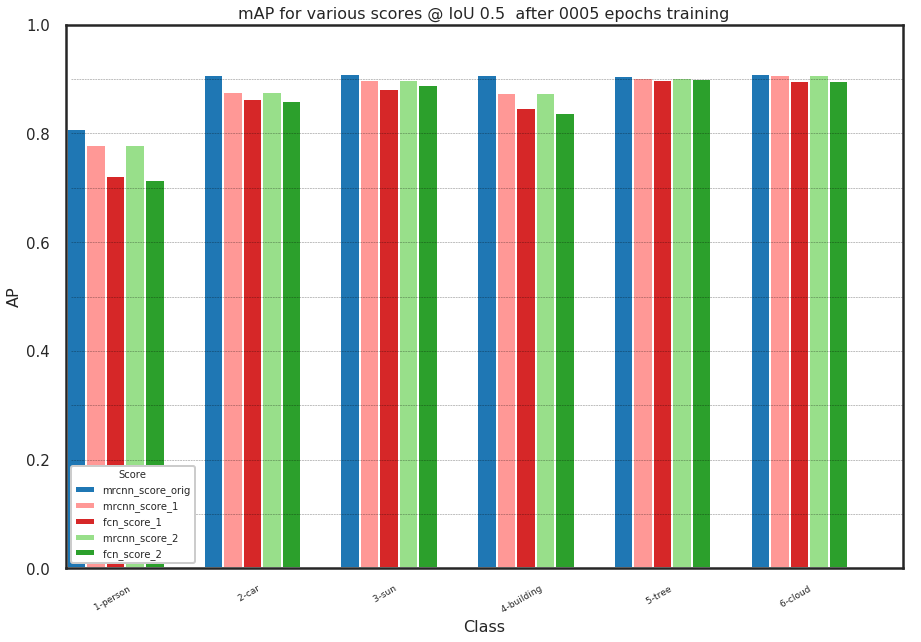


                                       AP @ IoU 0.50 Thresholds for Computed Scores after 0005 epochs                                       

-----------------------------------------------------------------  scores  -----------------------------------------------------------------
Id - ClassName           mrcnn_score_orig     mrcnn_score_1       fcn_score_1     mrcnn_score_2       fcn_score_2
--------------------------------------------------------------------------------------------------------------------------------------------
 1 - person                        80.84%            77.78%            72.15%            77.85%            71.46% 
 2 - car                           90.82%            87.71%            86.32%            87.71%            86.05% 
 3 - sun                           90.91%            89.76%            88.11%            89.76%            88.83% 
 4 - building                      90.71%            87.52%            84.74%            87.52%            83.78% 
 

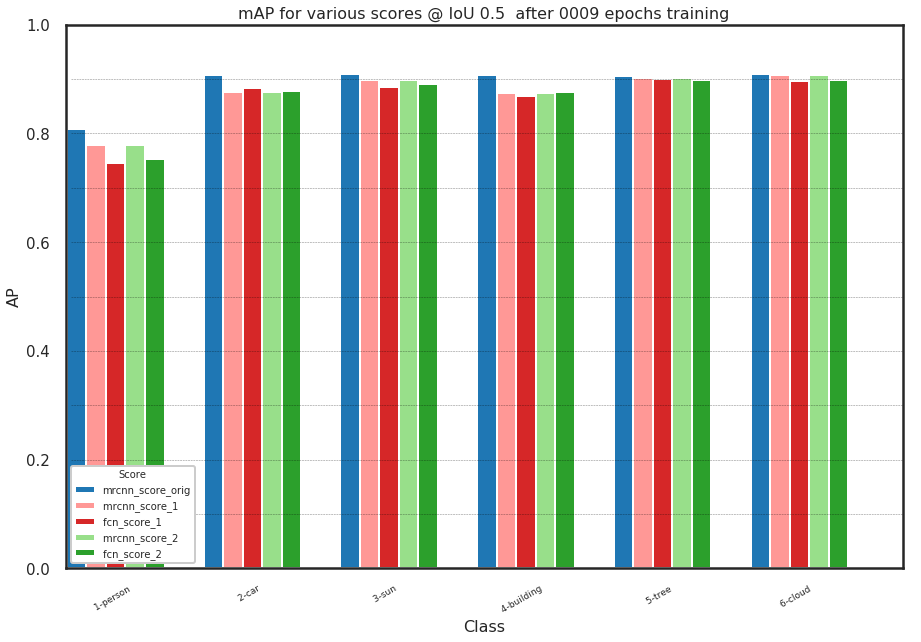


                                       AP @ IoU 0.50 Thresholds for Computed Scores after 0009 epochs                                       

-----------------------------------------------------------------  scores  -----------------------------------------------------------------
Id - ClassName           mrcnn_score_orig     mrcnn_score_1       fcn_score_1     mrcnn_score_2       fcn_score_2
--------------------------------------------------------------------------------------------------------------------------------------------
 1 - person                        80.84%            77.78%            74.53%            77.85%            75.31% 
 2 - car                           90.82%            87.71%            88.29%            87.71%            87.81% 
 3 - sun                           90.91%            89.76%            88.47%            89.76%            89.01% 
 4 - building                      90.71%            87.52%            86.96%            87.52%            87.55% 
 

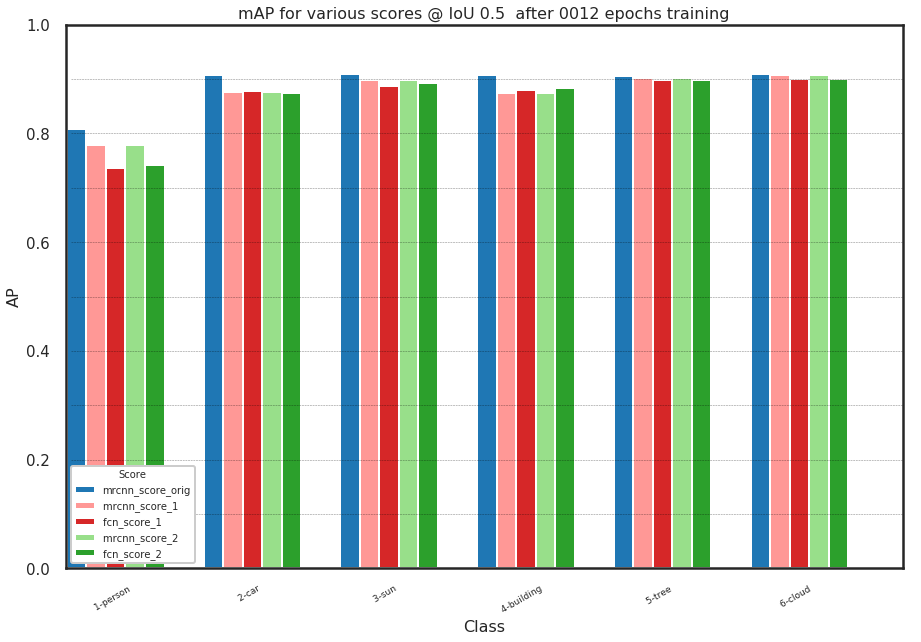


                                       AP @ IoU 0.50 Thresholds for Computed Scores after 0012 epochs                                       

-----------------------------------------------------------------  scores  -----------------------------------------------------------------
Id - ClassName           mrcnn_score_orig     mrcnn_score_1       fcn_score_1     mrcnn_score_2       fcn_score_2
--------------------------------------------------------------------------------------------------------------------------------------------
 1 - person                        80.84%            77.78%            73.60%            77.85%            74.13% 
 2 - car                           90.82%            87.71%            87.74%            87.71%            87.52% 
 3 - sun                           90.91%            89.76%            88.78%            89.76%            89.30% 
 4 - building                      90.71%            87.52%            87.92%            87.52%            88.30% 
 

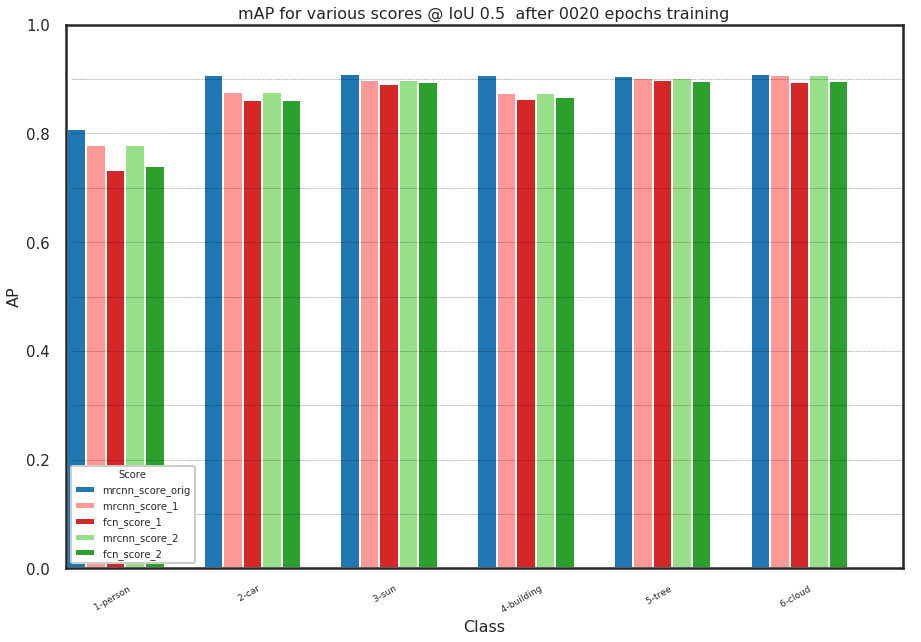


                                       AP @ IoU 0.50 Thresholds for Computed Scores after 0020 epochs                                       

-----------------------------------------------------------------  scores  -----------------------------------------------------------------
Id - ClassName           mrcnn_score_orig     mrcnn_score_1       fcn_score_1     mrcnn_score_2       fcn_score_2
--------------------------------------------------------------------------------------------------------------------------------------------
 1 - person                        80.84%            77.78%            73.23%            77.85%            74.02% 
 2 - car                           90.82%            87.71%            86.16%            87.71%            86.11% 
 3 - sun                           90.91%            89.76%            89.17%            89.76%            89.37% 
 4 - building                      90.71%            87.52%            86.32%            87.52%            86.66% 
 

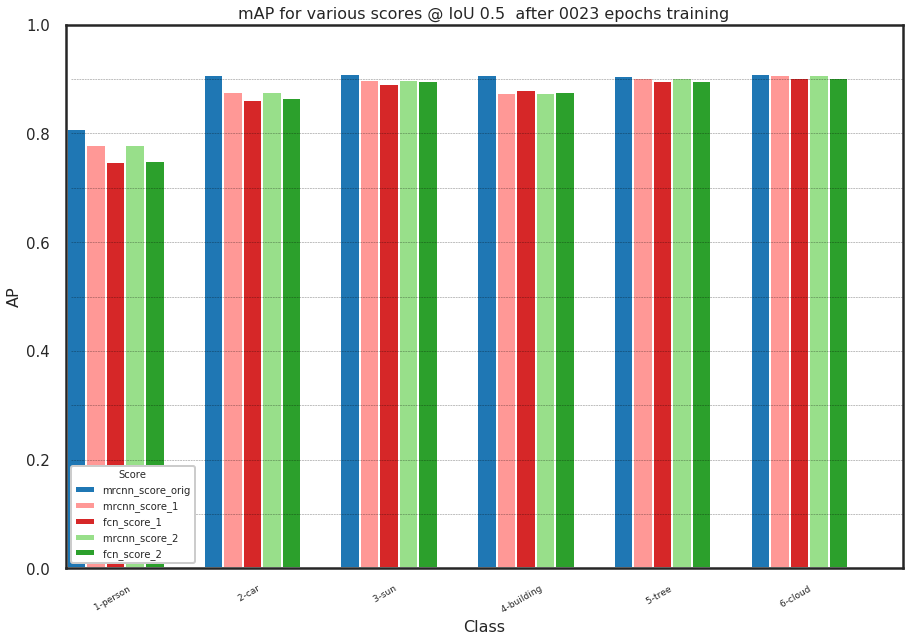


                                       AP @ IoU 0.50 Thresholds for Computed Scores after 0023 epochs                                       

-----------------------------------------------------------------  scores  -----------------------------------------------------------------
Id - ClassName           mrcnn_score_orig     mrcnn_score_1       fcn_score_1     mrcnn_score_2       fcn_score_2
--------------------------------------------------------------------------------------------------------------------------------------------
 1 - person                        80.84%            77.78%            74.72%            77.85%            74.98% 
 2 - car                           90.82%            87.71%            86.19%            87.71%            86.59% 
 3 - sun                           90.91%            89.76%            89.18%            89.76%            89.59% 
 4 - building                      90.71%            87.52%            87.99%            87.52%            87.68% 
 

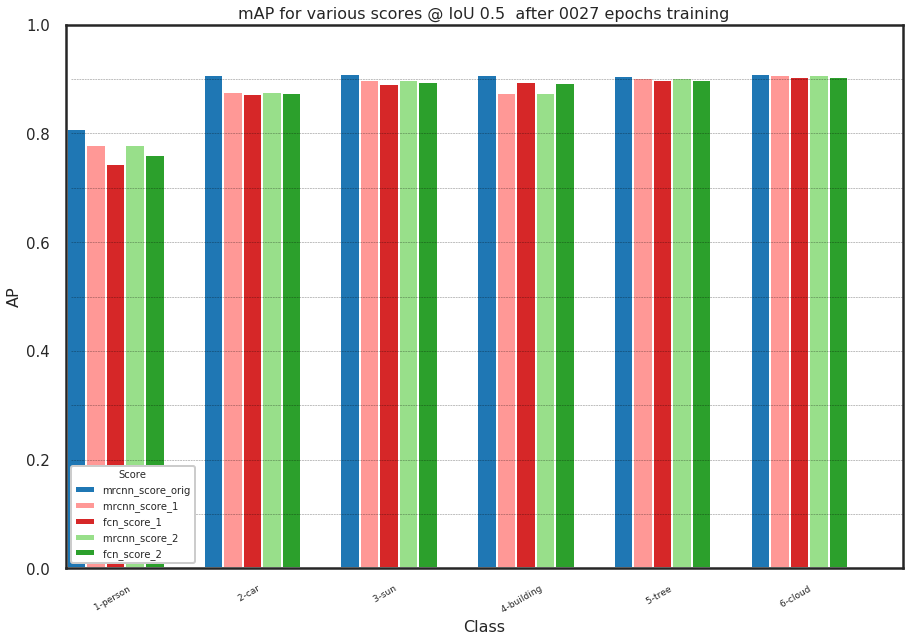


                                       AP @ IoU 0.50 Thresholds for Computed Scores after 0027 epochs                                       

-----------------------------------------------------------------  scores  -----------------------------------------------------------------
Id - ClassName           mrcnn_score_orig     mrcnn_score_1       fcn_score_1     mrcnn_score_2       fcn_score_2
--------------------------------------------------------------------------------------------------------------------------------------------
 1 - person                        80.84%            77.78%            74.41%            77.85%            76.03% 
 2 - car                           90.82%            87.71%            87.32%            87.71%            87.36% 
 3 - sun                           90.91%            89.76%            89.04%            89.76%            89.40% 
 4 - building                      90.71%            87.52%            89.49%            87.52%            89.31% 
 

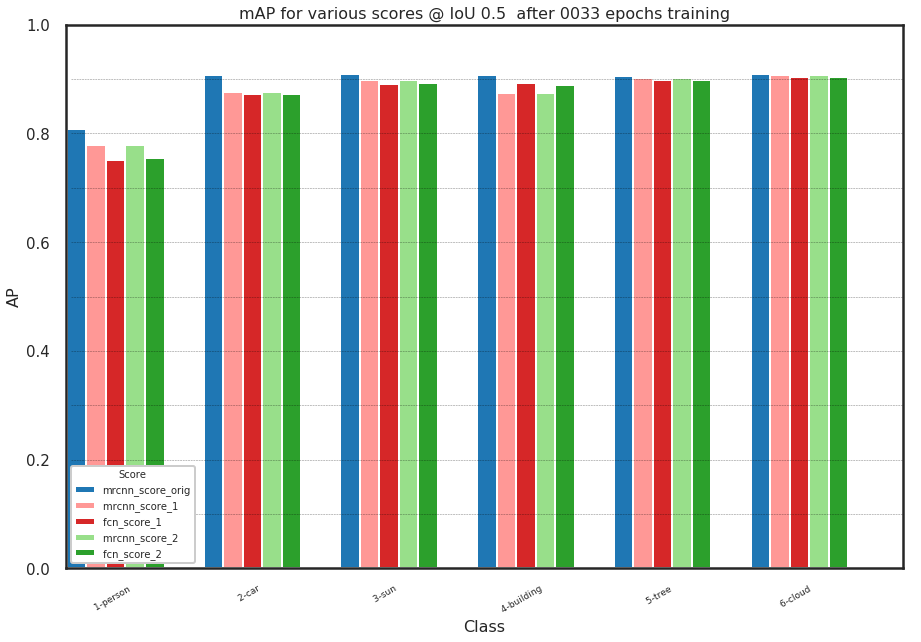


                                       AP @ IoU 0.50 Thresholds for Computed Scores after 0033 epochs                                       

-----------------------------------------------------------------  scores  -----------------------------------------------------------------
Id - ClassName           mrcnn_score_orig     mrcnn_score_1       fcn_score_1     mrcnn_score_2       fcn_score_2
--------------------------------------------------------------------------------------------------------------------------------------------
 1 - person                        80.84%            77.78%            75.08%            77.85%            75.51% 
 2 - car                           90.82%            87.71%            87.24%            87.71%            87.26% 
 3 - sun                           90.91%            89.76%            89.16%            89.76%            89.26% 
 4 - building                      90.71%            87.52%            89.23%            87.52%            88.98% 
 

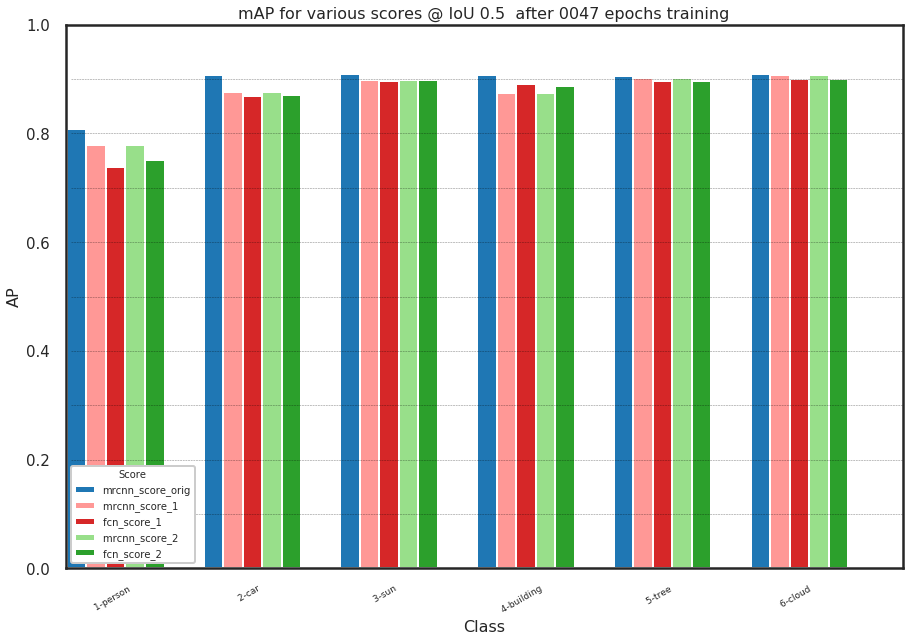


                                       AP @ IoU 0.50 Thresholds for Computed Scores after 0047 epochs                                       

-----------------------------------------------------------------  scores  -----------------------------------------------------------------
Id - ClassName           mrcnn_score_orig     mrcnn_score_1       fcn_score_1     mrcnn_score_2       fcn_score_2
--------------------------------------------------------------------------------------------------------------------------------------------
 1 - person                        80.84%            77.78%            73.86%            77.85%            75.04% 
 2 - car                           90.82%            87.71%            86.94%            87.71%            87.04% 
 3 - sun                           90.91%            89.76%            89.62%            89.76%            89.82% 
 4 - building                      90.71%            87.52%            89.02%            87.52%            88.69% 
 

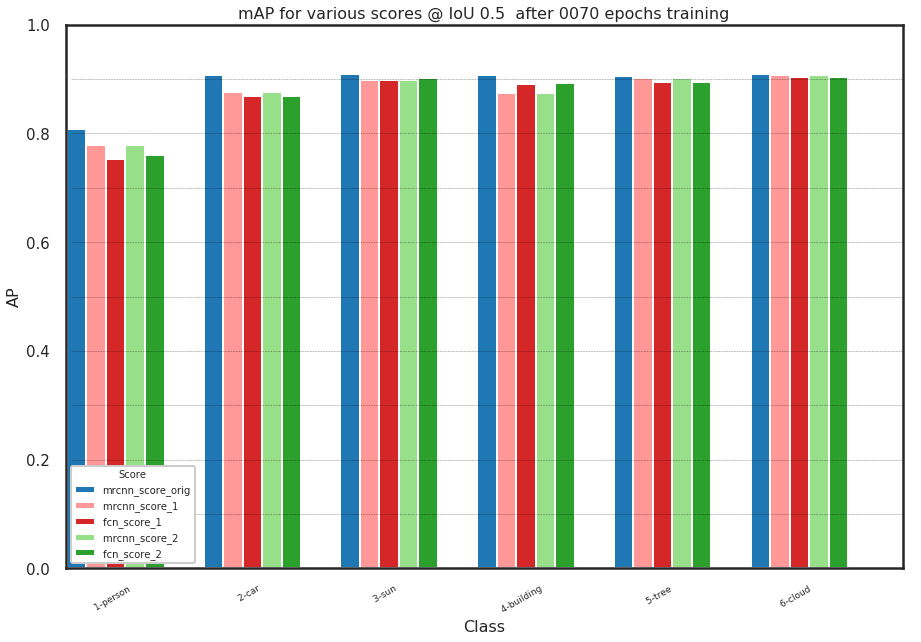


                                       AP @ IoU 0.50 Thresholds for Computed Scores after 0070 epochs                                       

-----------------------------------------------------------------  scores  -----------------------------------------------------------------
Id - ClassName           mrcnn_score_orig     mrcnn_score_1       fcn_score_1     mrcnn_score_2       fcn_score_2
--------------------------------------------------------------------------------------------------------------------------------------------
 1 - person                        80.84%            77.78%            75.23%            77.85%            76.11% 
 2 - car                           90.82%            87.71%            86.82%            87.71%            86.83% 
 3 - sun                           90.91%            89.76%            89.90%            89.76%            90.14% 
 4 - building                      90.71%            87.52%            89.15%            87.52%            89.35% 
 

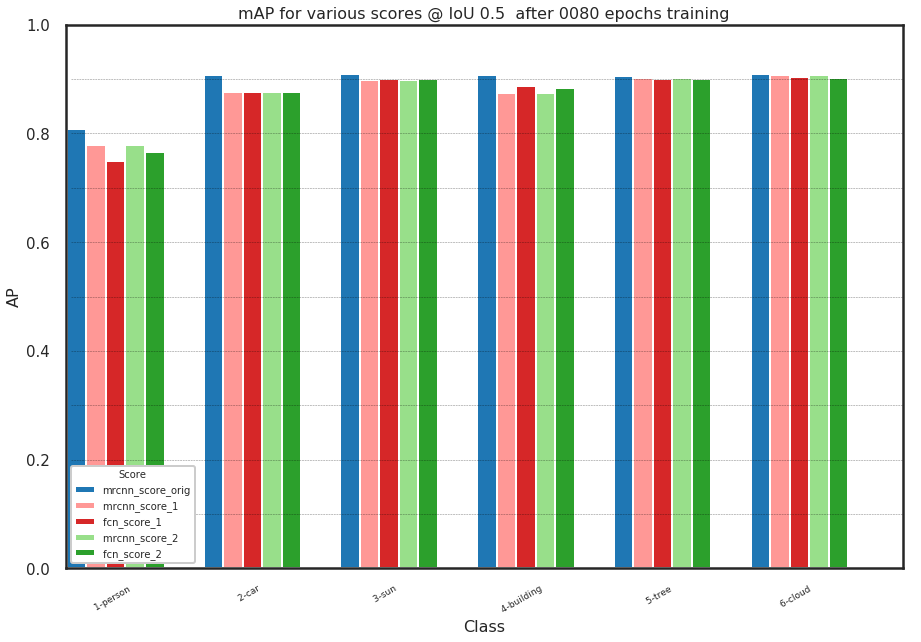


                                       AP @ IoU 0.50 Thresholds for Computed Scores after 0080 epochs                                       

-----------------------------------------------------------------  scores  -----------------------------------------------------------------
Id - ClassName           mrcnn_score_orig     mrcnn_score_1       fcn_score_1     mrcnn_score_2       fcn_score_2
--------------------------------------------------------------------------------------------------------------------------------------------
 1 - person                        80.84%            77.78%            74.96%            77.85%            76.54% 
 2 - car                           90.82%            87.71%            87.63%            87.71%            87.60% 
 3 - sun                           90.91%            89.76%            89.98%            89.76%            90.03% 
 4 - building                      90.71%            87.52%            88.69%            87.52%            88.34% 
 

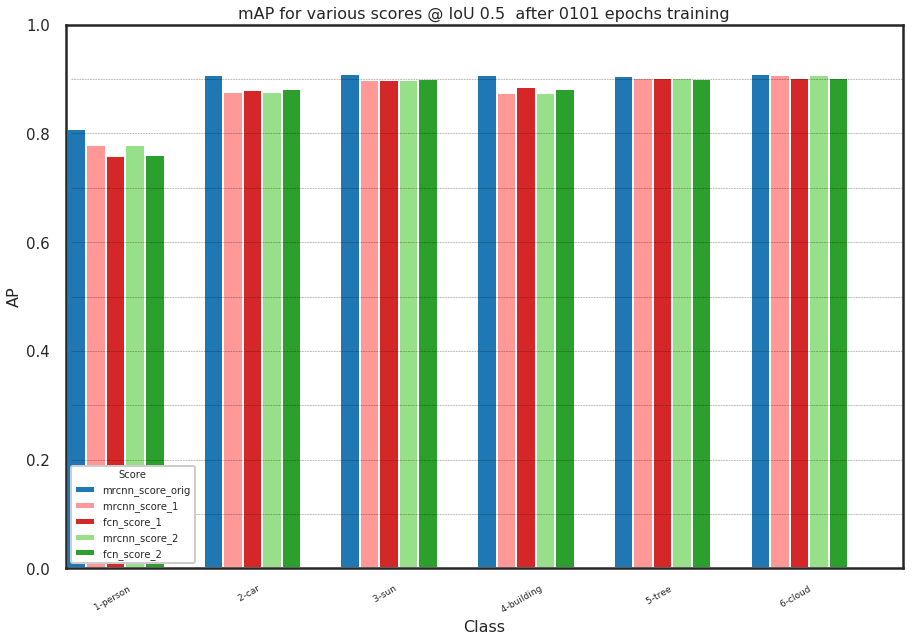


                                       AP @ IoU 0.50 Thresholds for Computed Scores after 0101 epochs                                       

-----------------------------------------------------------------  scores  -----------------------------------------------------------------
Id - ClassName           mrcnn_score_orig     mrcnn_score_1       fcn_score_1     mrcnn_score_2       fcn_score_2
--------------------------------------------------------------------------------------------------------------------------------------------
 1 - person                        80.84%            77.78%            75.89%            77.85%            75.97% 
 2 - car                           90.82%            87.71%            87.97%            87.71%            88.13% 
 3 - sun                           90.91%            89.76%            89.90%            89.76%            90.05% 
 4 - building                      90.71%            87.52%            88.62%            87.52%            88.09% 
 

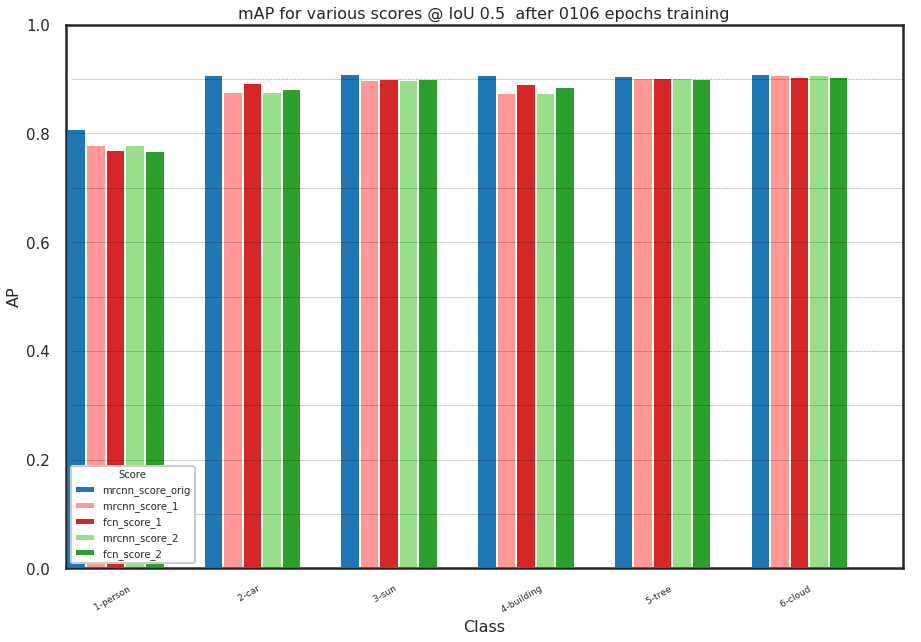


                                       AP @ IoU 0.50 Thresholds for Computed Scores after 0106 epochs                                       

-----------------------------------------------------------------  scores  -----------------------------------------------------------------
Id - ClassName           mrcnn_score_orig     mrcnn_score_1       fcn_score_1     mrcnn_score_2       fcn_score_2
--------------------------------------------------------------------------------------------------------------------------------------------
 1 - person                        80.84%            77.78%            76.91%            77.85%            76.80% 
 2 - car                           90.82%            87.71%            89.26%            87.71%            88.23% 
 3 - sun                           90.91%            89.76%            89.98%            89.76%            90.06% 
 4 - building                      90.71%            87.52%            89.08%            87.52%            88.49% 
 

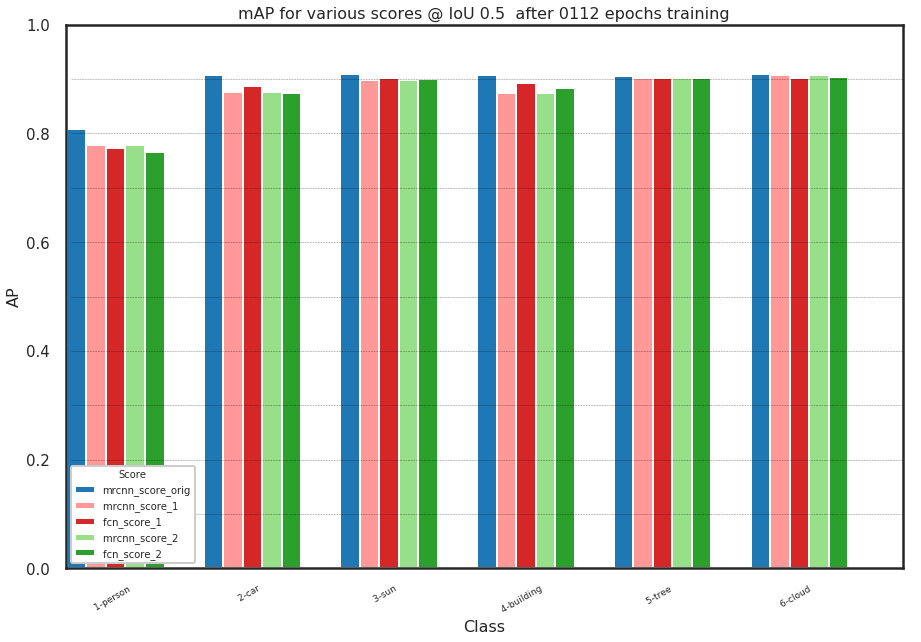


                                       AP @ IoU 0.50 Thresholds for Computed Scores after 0112 epochs                                       

-----------------------------------------------------------------  scores  -----------------------------------------------------------------
Id - ClassName           mrcnn_score_orig     mrcnn_score_1       fcn_score_1     mrcnn_score_2       fcn_score_2
--------------------------------------------------------------------------------------------------------------------------------------------
 1 - person                        80.84%            77.78%            77.37%            77.85%            76.62% 
 2 - car                           90.82%            87.71%            88.81%            87.71%            87.47% 
 3 - sun                           90.91%            89.76%            90.11%            89.76%            90.03% 
 4 - building                      90.71%            87.52%            89.19%            87.52%            88.43% 
 

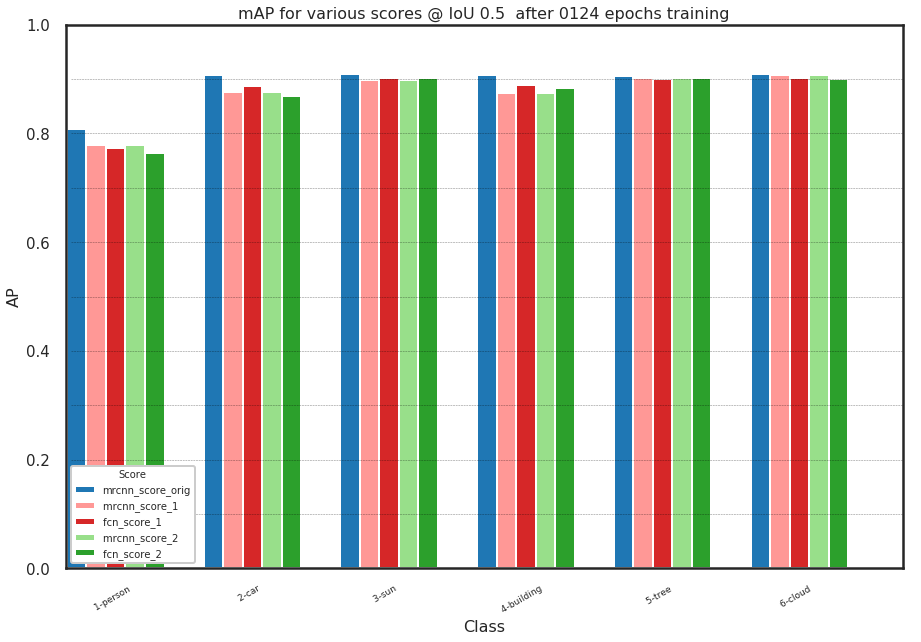


                                       AP @ IoU 0.50 Thresholds for Computed Scores after 0124 epochs                                       

-----------------------------------------------------------------  scores  -----------------------------------------------------------------
Id - ClassName           mrcnn_score_orig     mrcnn_score_1       fcn_score_1     mrcnn_score_2       fcn_score_2
--------------------------------------------------------------------------------------------------------------------------------------------
 1 - person                        80.84%            77.78%            77.38%            77.85%            76.47% 
 2 - car                           90.82%            87.71%            88.76%            87.71%            86.95% 
 3 - sun                           90.91%            89.76%            90.25%            89.76%            90.12% 
 4 - building                      90.71%            87.52%            89.00%            87.52%            88.33% 
 

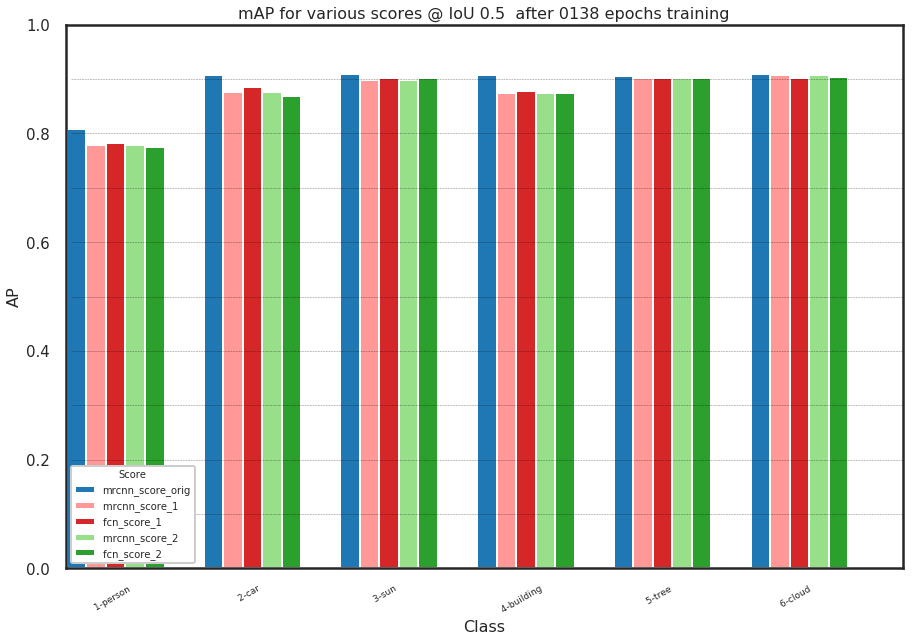


                                       AP @ IoU 0.50 Thresholds for Computed Scores after 0138 epochs                                       

-----------------------------------------------------------------  scores  -----------------------------------------------------------------
Id - ClassName           mrcnn_score_orig     mrcnn_score_1       fcn_score_1     mrcnn_score_2       fcn_score_2
--------------------------------------------------------------------------------------------------------------------------------------------
 1 - person                        80.84%            77.78%            78.16%            77.85%            77.45% 
 2 - car                           90.82%            87.71%            88.51%            87.71%            86.86% 
 3 - sun                           90.91%            89.76%            90.22%            89.76%            90.22% 
 4 - building                      90.71%            87.52%            87.89%            87.52%            87.51% 
 

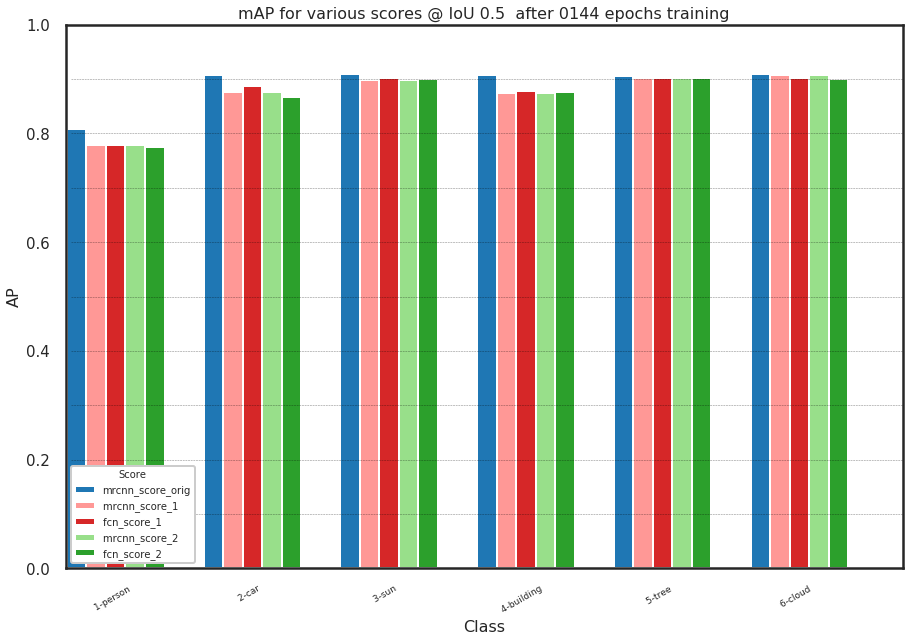


                                       AP @ IoU 0.50 Thresholds for Computed Scores after 0144 epochs                                       

-----------------------------------------------------------------  scores  -----------------------------------------------------------------
Id - ClassName           mrcnn_score_orig     mrcnn_score_1       fcn_score_1     mrcnn_score_2       fcn_score_2
--------------------------------------------------------------------------------------------------------------------------------------------
 1 - person                        80.84%            77.78%            77.89%            77.85%            77.53% 
 2 - car                           90.82%            87.71%            88.66%            87.71%            86.78% 
 3 - sun                           90.91%            89.76%            90.15%            89.76%            90.03% 
 4 - building                      90.71%            87.52%            87.84%            87.52%            87.69% 
 

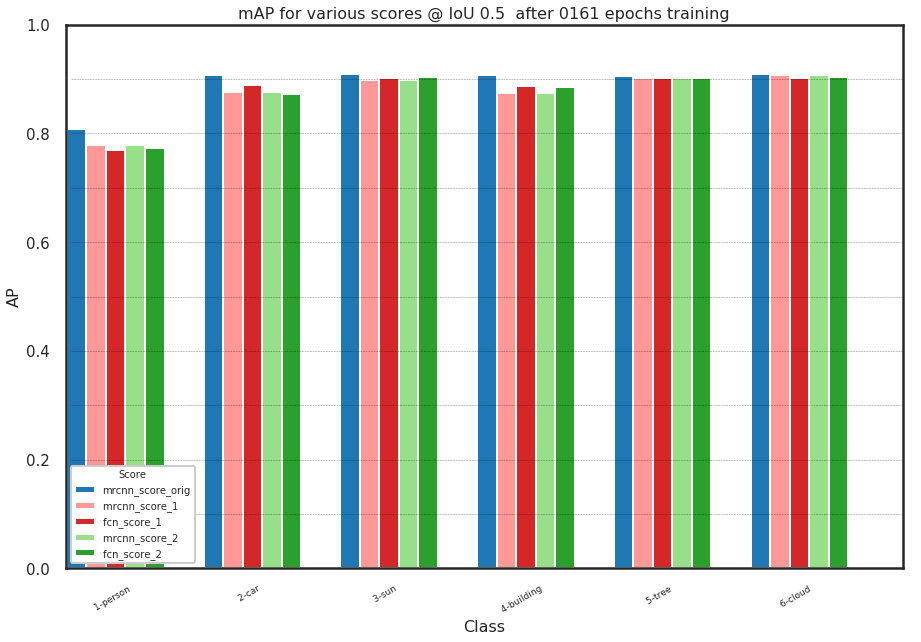


                                       AP @ IoU 0.50 Thresholds for Computed Scores after 0161 epochs                                       

-----------------------------------------------------------------  scores  -----------------------------------------------------------------
Id - ClassName           mrcnn_score_orig     mrcnn_score_1       fcn_score_1     mrcnn_score_2       fcn_score_2
--------------------------------------------------------------------------------------------------------------------------------------------
 1 - person                        80.84%            77.78%            77.01%            77.85%            77.32% 
 2 - car                           90.82%            87.71%            88.83%            87.71%            87.22% 
 3 - sun                           90.91%            89.76%            90.20%            89.76%            90.34% 
 4 - building                      90.71%            87.52%            88.64%            87.52%            88.48% 
 

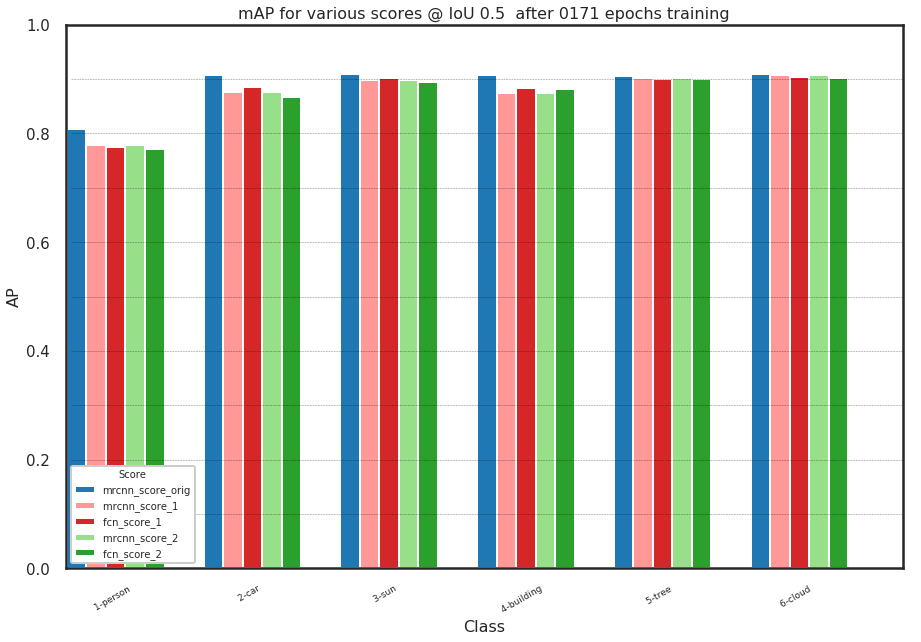


                                       AP @ IoU 0.50 Thresholds for Computed Scores after 0171 epochs                                       

-----------------------------------------------------------------  scores  -----------------------------------------------------------------
Id - ClassName           mrcnn_score_orig     mrcnn_score_1       fcn_score_1     mrcnn_score_2       fcn_score_2
--------------------------------------------------------------------------------------------------------------------------------------------
 1 - person                        80.84%            77.78%            77.58%            77.85%            77.16% 
 2 - car                           90.82%            87.71%            88.50%            87.71%            86.64% 
 3 - sun                           90.91%            89.76%            90.17%            89.76%            89.52% 
 4 - building                      90.71%            87.52%            88.41%            87.52%            88.13% 
 

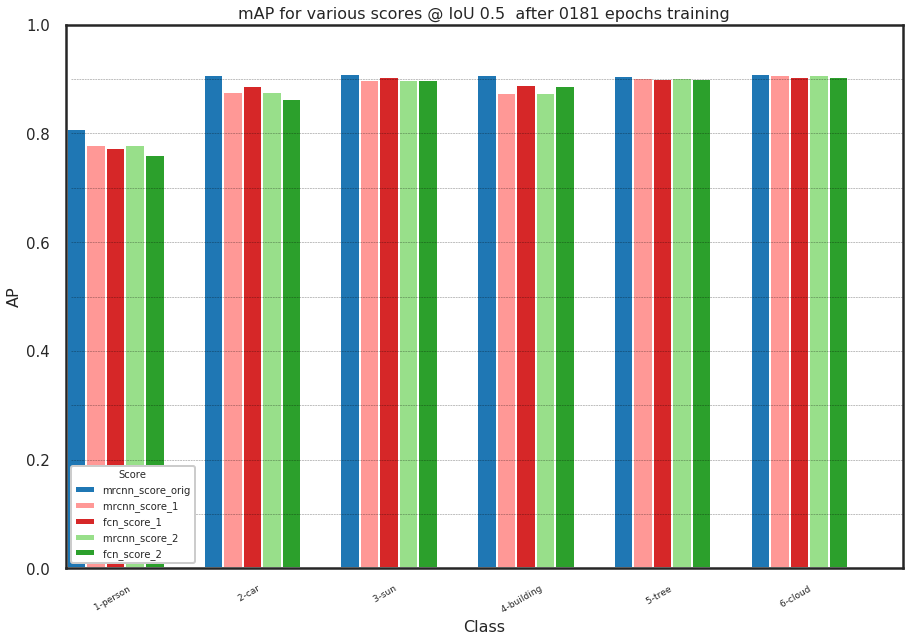


                                       AP @ IoU 0.50 Thresholds for Computed Scores after 0181 epochs                                       

-----------------------------------------------------------------  scores  -----------------------------------------------------------------
Id - ClassName           mrcnn_score_orig     mrcnn_score_1       fcn_score_1     mrcnn_score_2       fcn_score_2
--------------------------------------------------------------------------------------------------------------------------------------------
 1 - person                        80.84%            77.78%            77.30%            77.85%            76.05% 
 2 - car                           90.82%            87.71%            88.80%            87.71%            86.38% 
 3 - sun                           90.91%            89.76%            90.31%            89.76%            89.83% 
 4 - building                      90.71%            87.52%            88.89%            87.52%            88.72% 
 

In [26]:
disp_scores  = [ 'mrcnn_score_orig' ,'mrcnn_score_1', 'fcn_score_1', 'mrcnn_score_2', 'fcn_score_2']

for FILE_IDX in range(len(files)):
    epochs = files[FILE_IDX].split('_')[1].replace('.h5','')
    map_info_file = 'test_map_info_epoch' +epochs+'.pkl'
#     cls_info_file = 'test_cls_info_epoch' +epochs+'_500.pkl'
#     pr_boxes_file = 'test_pr_bboxes_epoch'+epochs+'_500.pkl'
#     gt_boxes_file = 'test_gt_bboxes_epoch'+epochs+'_500.pkl'

    with open(os.path.join(map_path, map_info_file), 'rb') as infile:
        all_data = pickle.load(infile)             
    print('loaded :', map_info_file)  
#     print('loaded :', cls_info_file)
    # disp_scores  = [ 'mrcnn_score_orig' , 'mrcnn_score_norm', 'mrcnn_score_0', 'mrcnn_score_1', 'mrcnn_score_2', 'fcn_score_0', 'fcn_score_1', 'fcn_score_2']
    print('Epch:', epochs)
    cmap.plot_mAP_vs_class_BarChart(all_data, disp_scores, class_ids= CLASS_IDS, class_names = CLASS_NAMES, iou = 0.5, epochs = epochs)
